# StatArray Class
### Extends the numpy ndarray class to add extra attributes such as names, and units, and allows us to attach statistical descriptors of the array.  The direct extension to numpy maintains speed and functionality of numpy arrays.
##### Back to [Main](MAIN_PAGE.ipynb)

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from geobipy import StatArray
import numpy as np
import matplotlib.pyplot as plt
import h5py
from geobipy import hdfRead

## Instantiating a new StatArray class
The StatArray can take any numpy function that returns an array as an input.  The name and units of the variable can be assigned to the StatArray.

In [3]:
Density = StatArray(np.random.randn(3), name="Density", units="$\frac{g}{cc}$")
Density.summary()

Name:  Density
    Units: $\frac{g}{cc}$
    Shape: (3,)
   Values: [-0.33320418 -0.59563637 -1.54961823]
No attached prior 
No attached proposal 



## Attaching a Prior and Proposal Distributions to an StatArray
The StatArray class has been built so that we may easily attach not only names and units, but statistical distributions too.  We won't go into too much detail about the different distribution classes here so check out [This Notebook](Distributions.ipynb) for a better description.

Two types of distributions can be attached to the StatArray.
* Prior Distribution
    The prior represents how the user believes the variable should behave from a statistical standpoint.  The values of the variable can be evaluated against the attached prior, to determine how likely they are to have occured [Wiki Page](https://en.wikipedia.org/wiki/Prior_probability).
* Proposal Distribution
    The proposal describes a probability distribution from which to sample when we wish to perturb the variable [Wiki Page](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm).

### Attach a univariate normal distribution as the prior

In [4]:
# Obtain an instantiation of a random number generator
prng = np.random.RandomState()
mean = 0.0
variance = 1.0
Density.setPrior('Normal', mean, variance, prng=prng)

#### We can also attach a proposal distribution

In [5]:
Density.setProposal('Normal', mean, variance, prng=prng)
Density.summary()
print("Class type of the prior: ",type(Density.prior))
print("Class type of the proposal: ",type(Density.proposal))

Name:  Density
    Units: $\frac{g}{cc}$
    Shape: (3,)
   Values: [-0.33320418 -0.59563637 -1.54961823]
Prior: 
Normal Distribution: 
    Mean: :0.0
Variance: :1.0
Proposal: 
Normal Distribution: 
    Mean: :0.0
Variance: :1.0

Class type of the prior:  <class 'geobipy.src.classes.statistics.NormalDistribution.Normal'>
Class type of the proposal:  <class 'geobipy.src.classes.statistics.NormalDistribution.Normal'>


#### The values in the variable can be evaluated against the prior
In this case, we have 3 elements in the variable, and a univariate Normal for the prior. Therefore each element is evaluated to get 3 probabilities, one for each element.

In [6]:
Density.probability()

array([0.37739947, 0.33409501, 0.12008003])

The univarite proposal distribution can generate random samples from itself.

In [7]:
Density.proposal.rng()

array([-0.03333791])

We can perturb the variable by drawing from the attached proposal distribution.

In [8]:
Density.perturb()

### Attach multivariate normal distributions as the prior and proposal
Attach the multivariate prior

In [9]:
mean = np.random.randn(Density.size)
variance = np.ones(Density.size)
Density.setPrior('MvNormal', mean, variance, prng=prng)

Since the prior is multivariate, the appropriate equations are used to evaluate the probability for all elements in the StatArray.

In [10]:
Density.probability()

0.0005729024969271514

Attach the multivariate proposal

In [11]:
mean = np.random.randn(Density.size)
variance = np.ones(Density.size)
Density.setProposal('MvNormal', mean, variance, prng=prng)

Perturb the variables using the multivariate proposal.

In [12]:
Density.perturb()

### Basic manipulation
#### The StatArray contains other functions to perform basic array manipulations

These routines essentially wrap around numpy functions, but the result will have the same name and units, and if any prior or proposal are set, those will be carried through too.

#### 1D example

In [13]:
x = StatArray(-np.cumsum(np.arange(10.0)))
x

StatArray([ -0.,  -1.,  -3., ..., -28., -36., -45.])

In [14]:
x.insert(i=[0, 9], values=[999.0, 999.0])

StatArray([999.,  -0.,  -1., ..., -36., 999., -45.])

In [15]:
x.prepend(999.0)

StatArray([999.,  -0.,  -1., ..., -28., -36., -45.])

In [16]:
x.prepend([998.0, 999.0])

StatArray([998., 999.,  -0., ..., -28., -36., -45.])

In [17]:
x.append([998.0, 999.0])

StatArray([ -0.,  -1.,  -3., ..., -45., 998., 999.])

In [18]:
x.resize(14)

StatArray([-0., -1., -3., ..., -1., -3., -6.])

In [19]:
x.delete([5,8])

StatArray([ -0.,  -1.,  -3., ..., -21., -28., -45.])

In [20]:
x.edges()

StatArray([  0.5,  -0.5,  -2. , ..., -32. , -40.5, -49.5])

In [21]:
x.internalEdges()

StatArray([ -0.5,  -2. ,  -4.5, ..., -24.5, -32. , -40.5])

In [22]:
x.firstNonZero()

array(1)

In [23]:
x.lastNonZero()

array(10)

#### 2D example

In [24]:
x = StatArray(np.asarray([[0, 2, 3],[3, 0, 1],[1, 2, 0]]))
x

StatArray([[0, 2, 3],
           [3, 0, 1],
           [1, 2, 0]])

In [25]:
x.insert(i=0, values=4)

StatArray([[4, 4, 4],
           [0, 2, 3],
           [3, 0, 1],
           [1, 2, 0]])

In [26]:
x.insert(i=[2, 3], values=5, axis=1)

StatArray([[0, 2, 5, 3, 5],
           [3, 0, 5, 1, 5],
           [1, 2, 5, 0, 5]])

In [27]:
x.insert(i=2, values=[10, 11, 12], axis=1)

StatArray([[ 0,  2, 10,  3],
           [ 3,  0, 11,  1],
           [ 1,  2, 12,  0]])

In [28]:
x.prepend(999)

StatArray([[999, 999, 999],
           [  0,   2,   3],
           [  3,   0,   1],
           [  1,   2,   0]])

In [29]:
x.prepend([999, 998, 997], axis=1)

StatArray([[999,   0,   2,   3],
           [998,   3,   0,   1],
           [997,   1,   2,   0]])

In [30]:
x.append([[999, 998, 997]])

StatArray([[  0,   2,   3],
           [  3,   0,   1],
           [  1,   2,   0],
           [999, 998, 997]])

In [31]:
x.resize([5,5])

StatArray([[0, 2, 3, 3, 0],
           [1, 1, 2, 0, 0],
           [2, 3, 3, 0, 1],
           [1, 2, 0, 0, 2],
           [3, 3, 0, 1, 1]])

In [32]:
x.delete(5)

StatArray([0, 2, 3, ..., 1, 2, 0])

In [33]:
x.delete(2, axis=0)

StatArray([[0, 2, 3],
           [3, 0, 1]])

In [34]:
x

StatArray([[0, 2, 3],
           [3, 0, 1],
           [1, 2, 0]])

In [35]:
x.firstNonZero(axis=0)

array([1, 0, 0])

In [36]:
x.lastNonZero(axis=0)

array([3, 3, 2])

In [37]:
x.firstNonZero(axis=1)

array([1, 0, 0])

In [38]:
x.lastNonZero(axis=1)

array([3, 3, 2])

### Plotting
#### We can easily plot the StatArray with its built in plotting functions.  All plotting functions can take the matplotlib keywords

The simplest is to just plot the array

In [39]:
Density = StatArray(np.random.randn(100),name="Density",units="$\frac{g}{cc}$")
Time = StatArray(np.linspace(0, 100, Density.size), name='Time', units='s')
Depth = StatArray(np.random.exponential(size=Density.size), name='Depth', units='m')

<IPython.core.display.Javascript object>


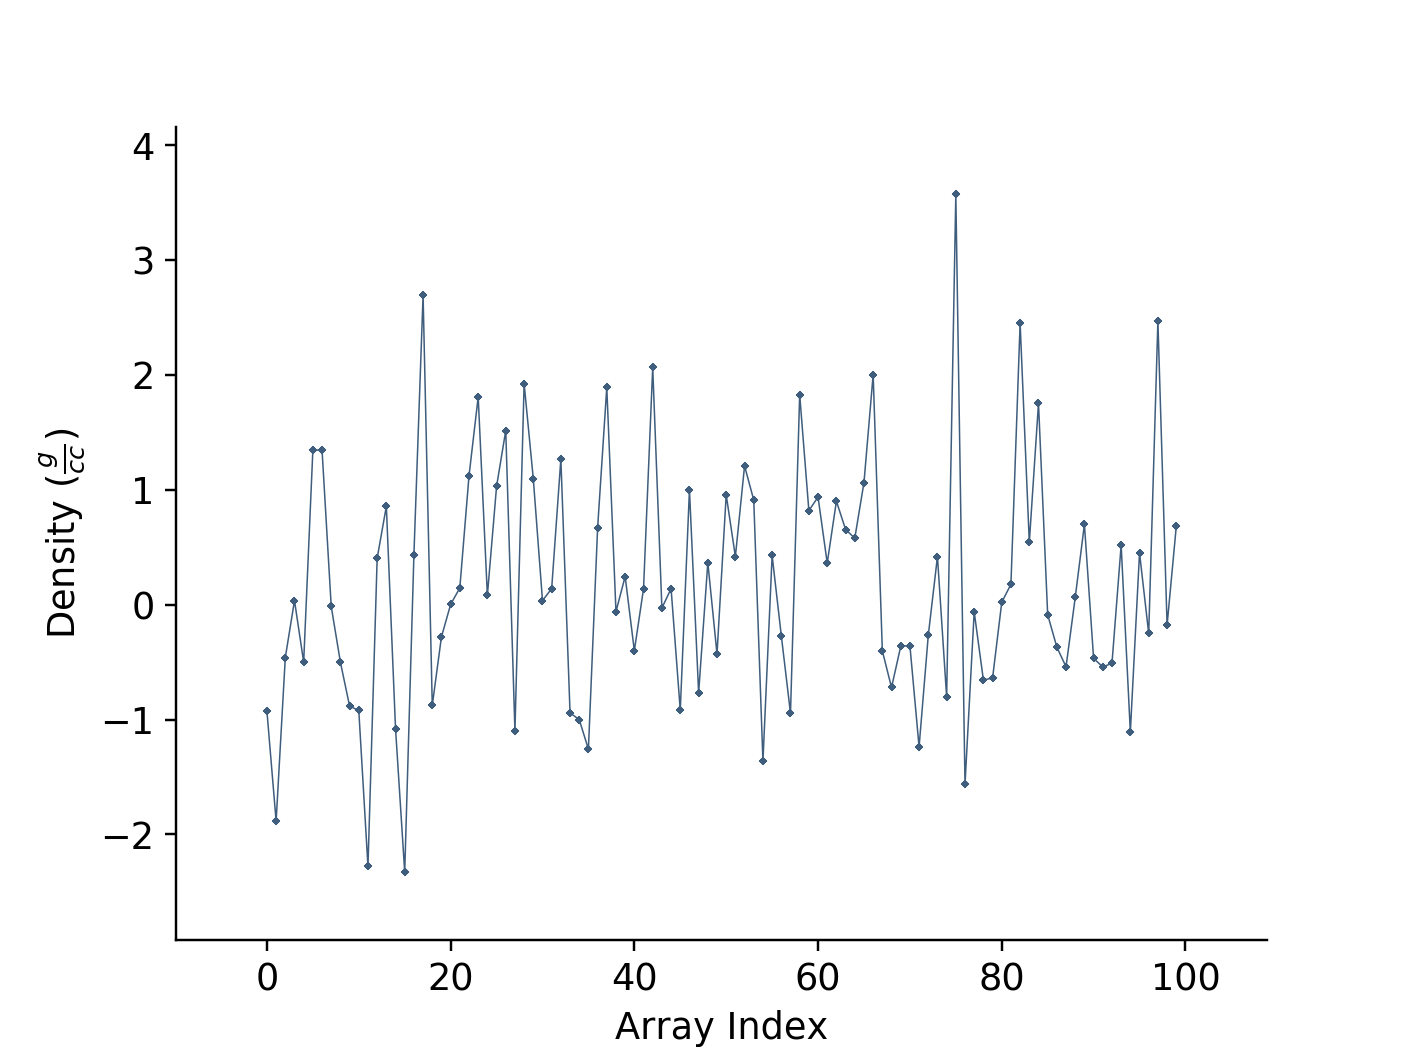

In [40]:
plt.figure()
Density.plot(linewidth=0.5, marker='x', markersize=1.0)

We can quickly plot a bar graph.

<IPython.core.display.Javascript object>


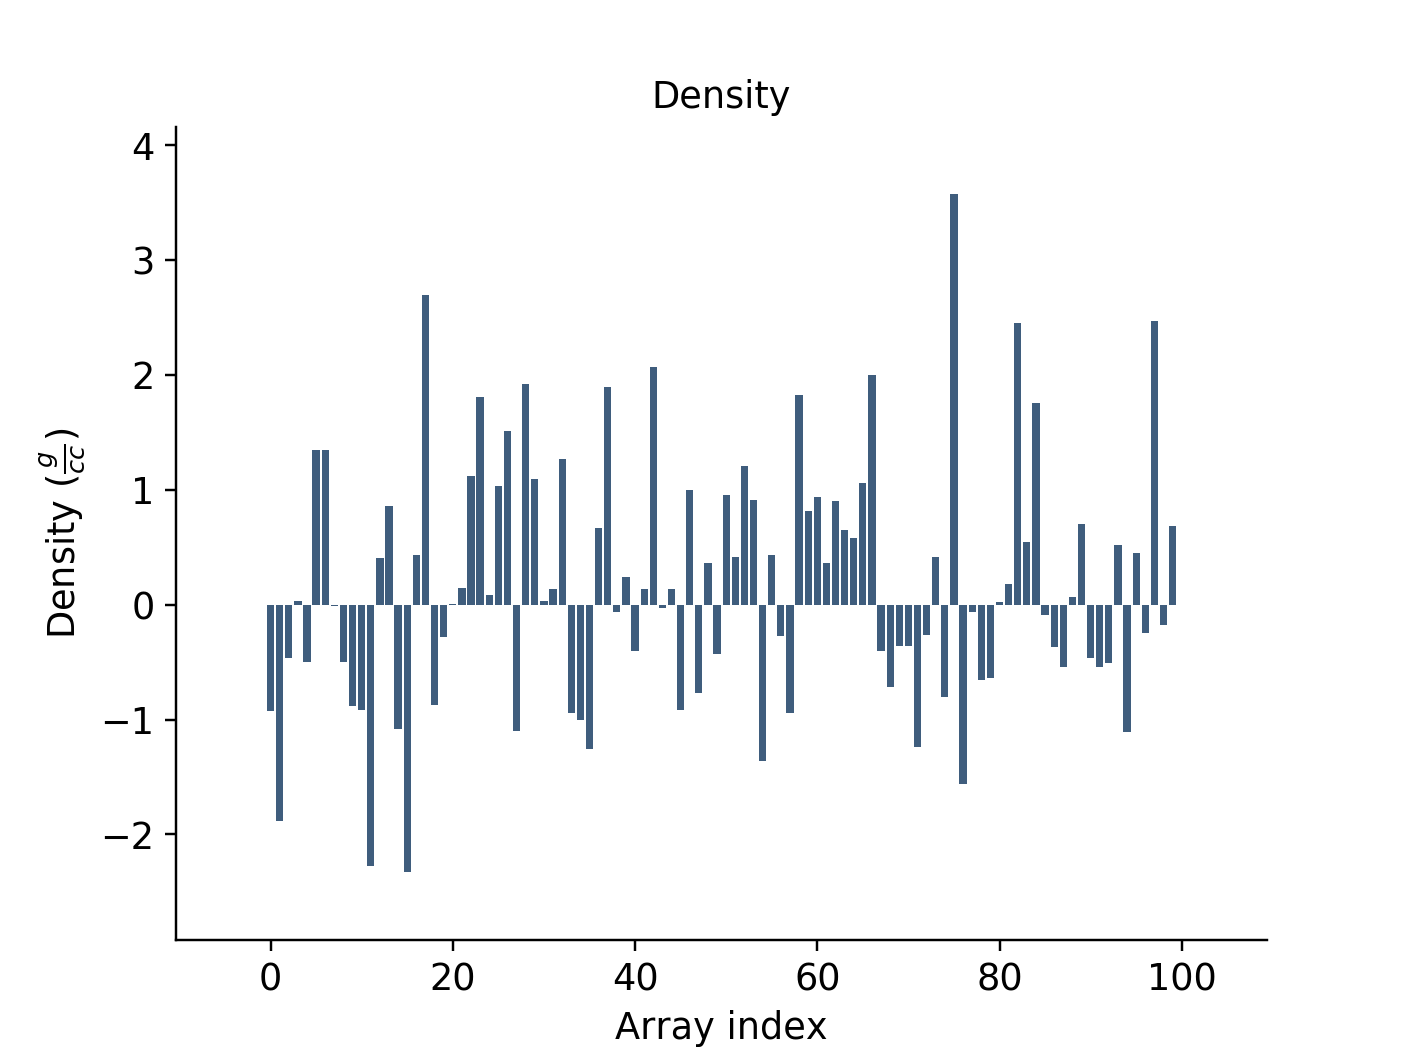

In [41]:
plt.figure()
Density.bar()

#### We can scatter the contents of the StatArray if it is 1D

<IPython.core.display.Javascript object>


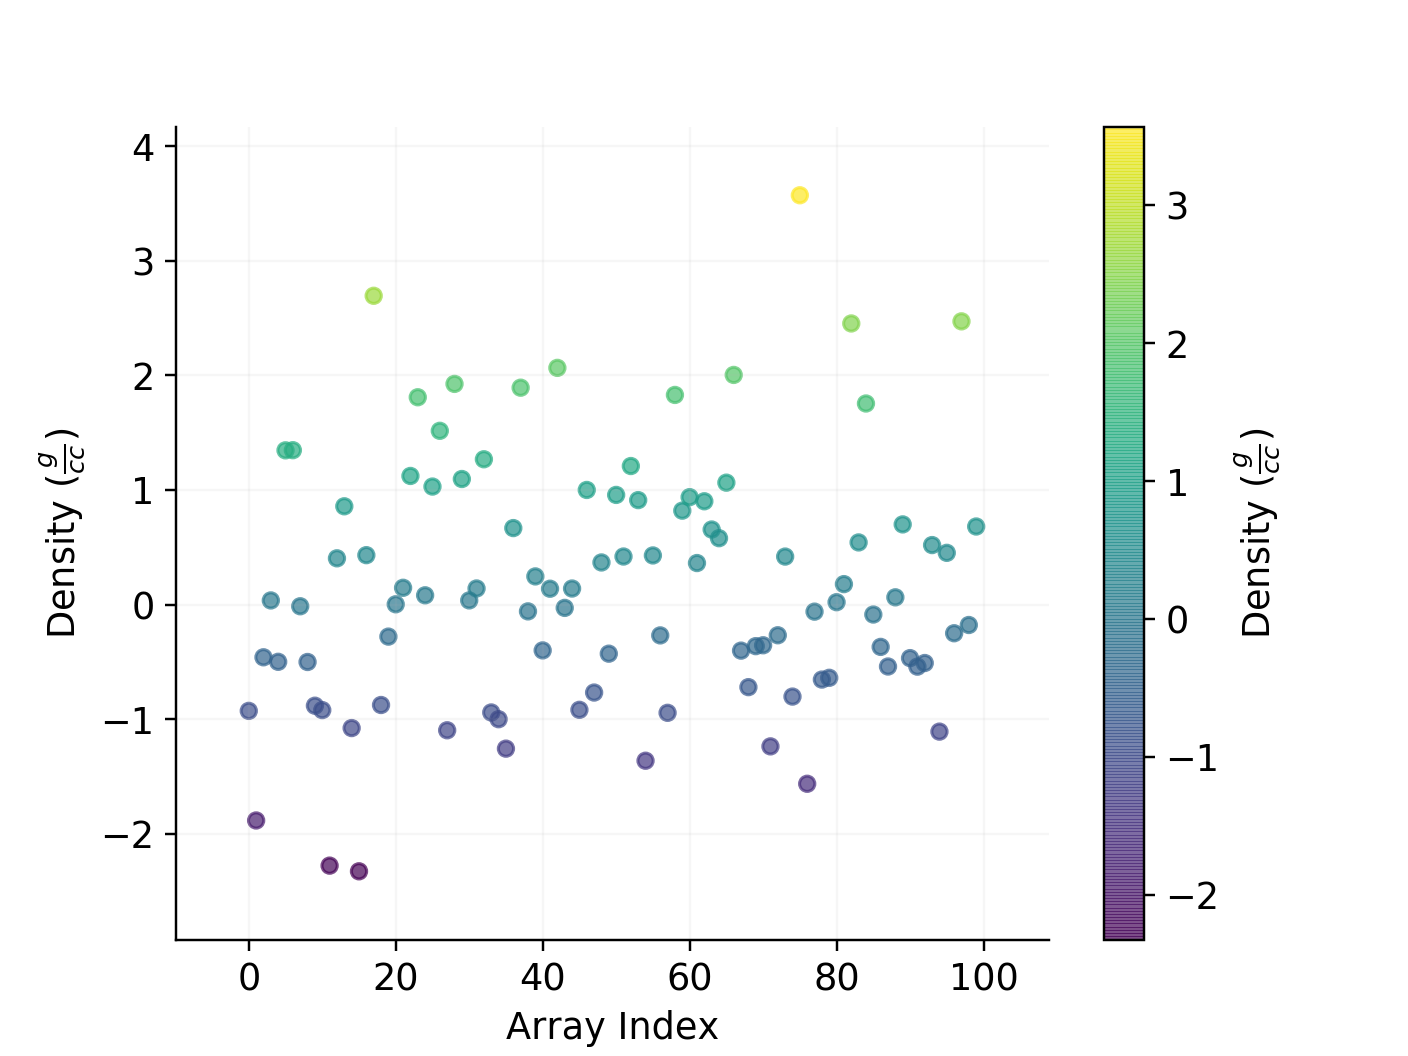

In [42]:
plt.figure()
Density.scatter(alpha=0.7)

#### Histogram Equalization
A neat trick with colourmaps is histogram equalization.  This approach forces all colours in the images to have an equal weight.  This distorts the colour bar, but can really highlight the lower and higher ends of whatever you are plotting. Just add the equalize keyword!

<IPython.core.display.Javascript object>


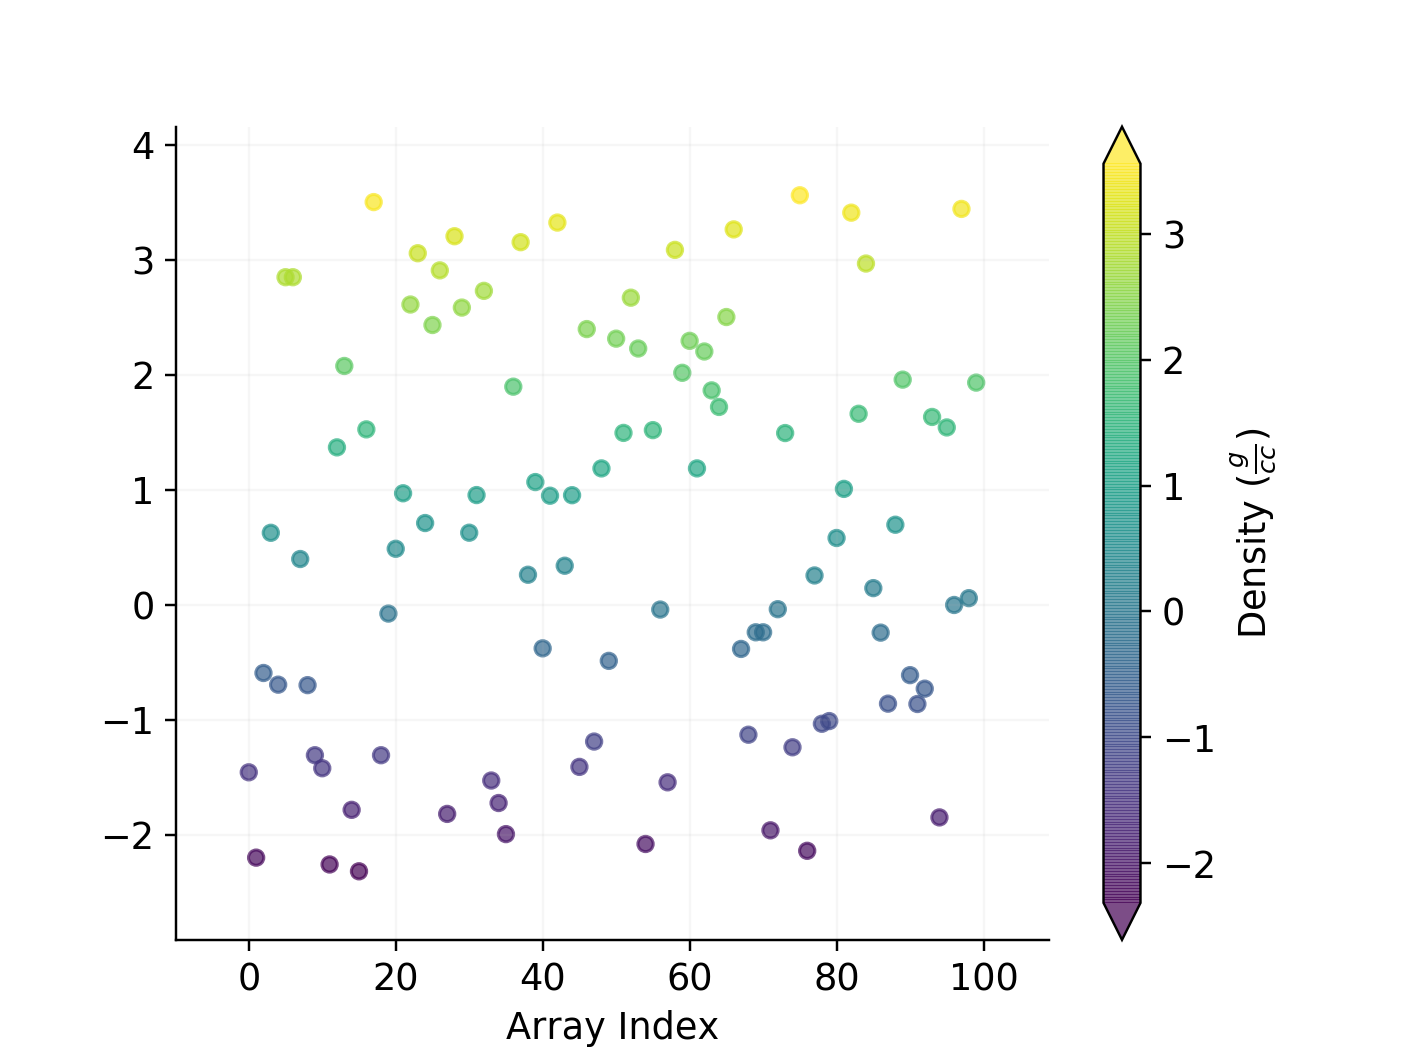

In [43]:
plt.figure()
Density.scatter(alpha=0.7, equalize=True)

#### Take the log base(x) of the data
We can also take the data to a log, log10, log2, or a custom number!

<IPython.core.display.Javascript object>


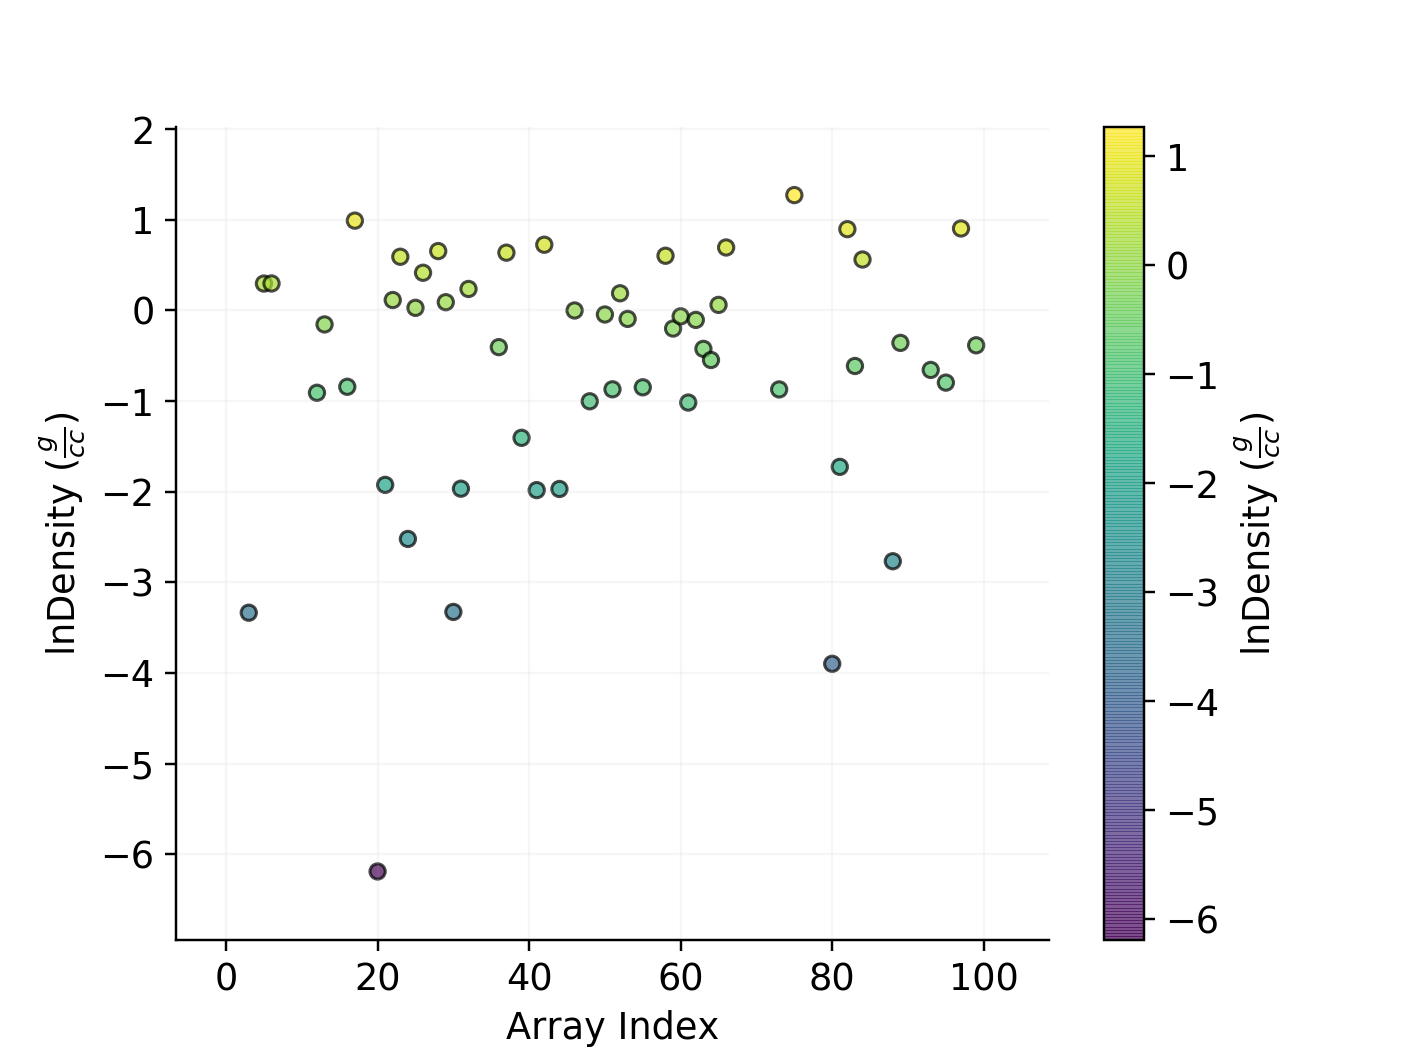

Values <= 0.0 have been masked before taking their log


In [44]:
plt.figure()
Density.scatter(alpha=0.7,edgecolor='k',log='e') # could also use log='e', log=2, log=x) where x is the base you require

#### X and Y axes
We can specify the x axis of the scatter plot.

<IPython.core.display.Javascript object>


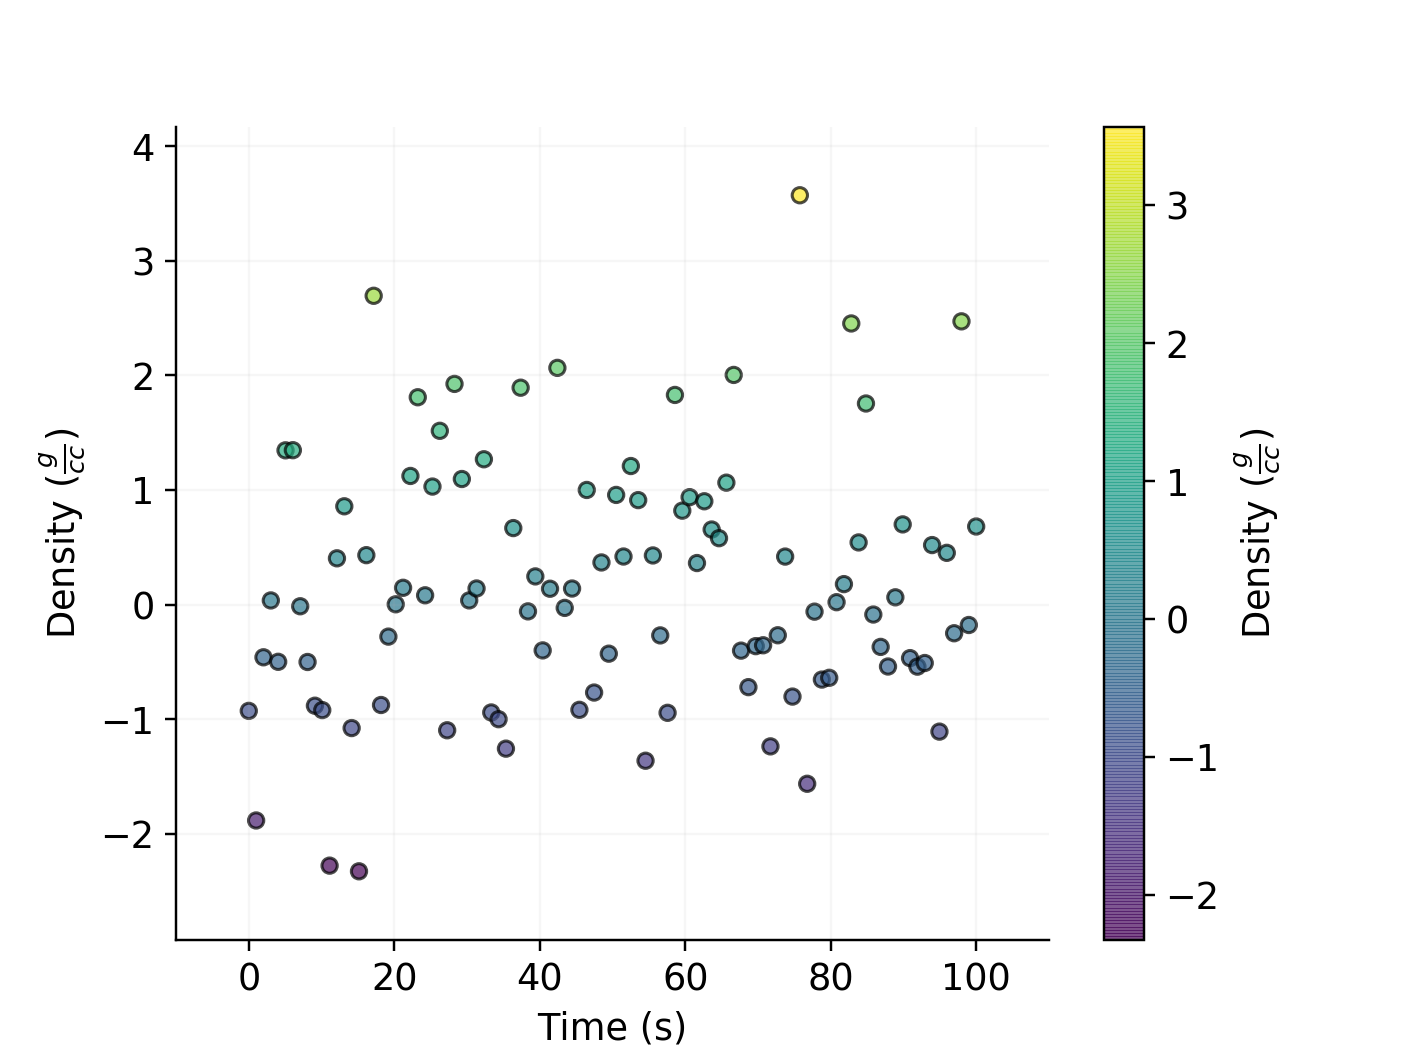

In [45]:
plt.figure()
Density.scatter(x=Time, alpha=0.7, edgecolor='k')

Notice that I never specified the y axis, so the y axis defaulted to the values in the StatArray. In this case, any operations applied to the colours, are also applied to the y axis, e.g. log=10.  When I take the values of Density to log base 10, because I do not specify the y plotting locations, those locations are similarly affected.

I can however force the y co-ordinates by specifying it as input. In the second subplot I explicitly plot distance on the y axis. In the first subplot, the y axis is the same as the colourbar.

<IPython.core.display.Javascript object>


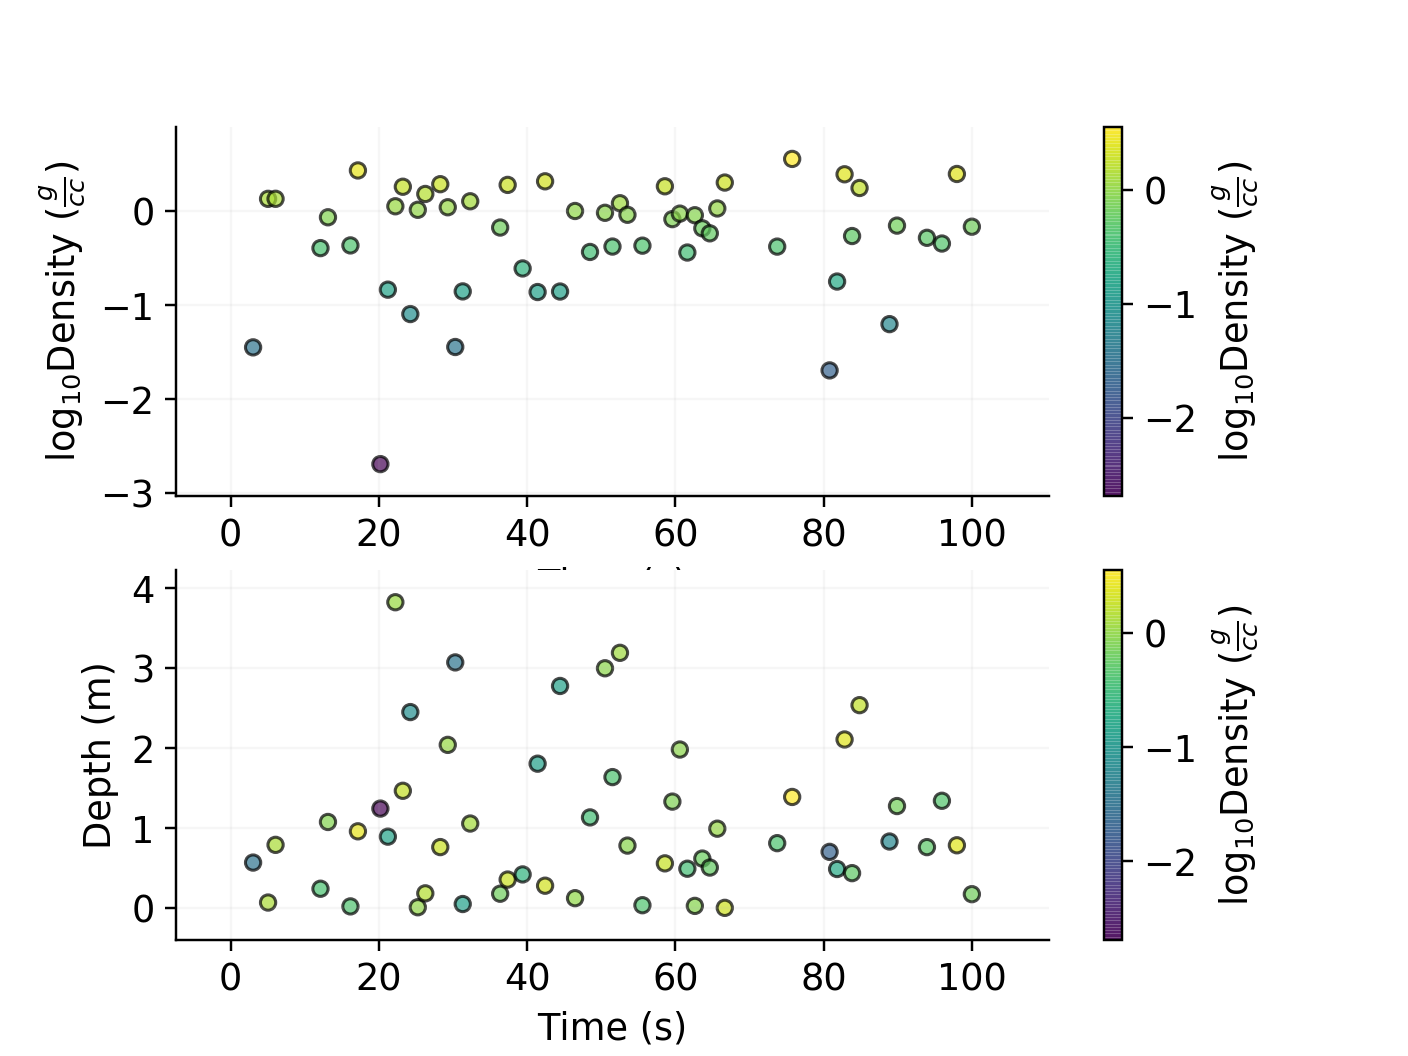

Values <= 0.0 have been masked before taking their log
Values <= 0.0 have been masked before taking their log


In [46]:
plt.figure()
ax1 = plt.subplot(211)
Density.scatter(x=Time, alpha=0.7, edgecolor='k', log=10)
plt.subplot(212, sharex=ax1)
Density.scatter(x=Time, y=Depth, alpha=0.7, edgecolor='k', log=10)

#### Point sizes
Since the plotting functions take matplotlib keywords, I can also specify the size of each points.

<IPython.core.display.Javascript object>


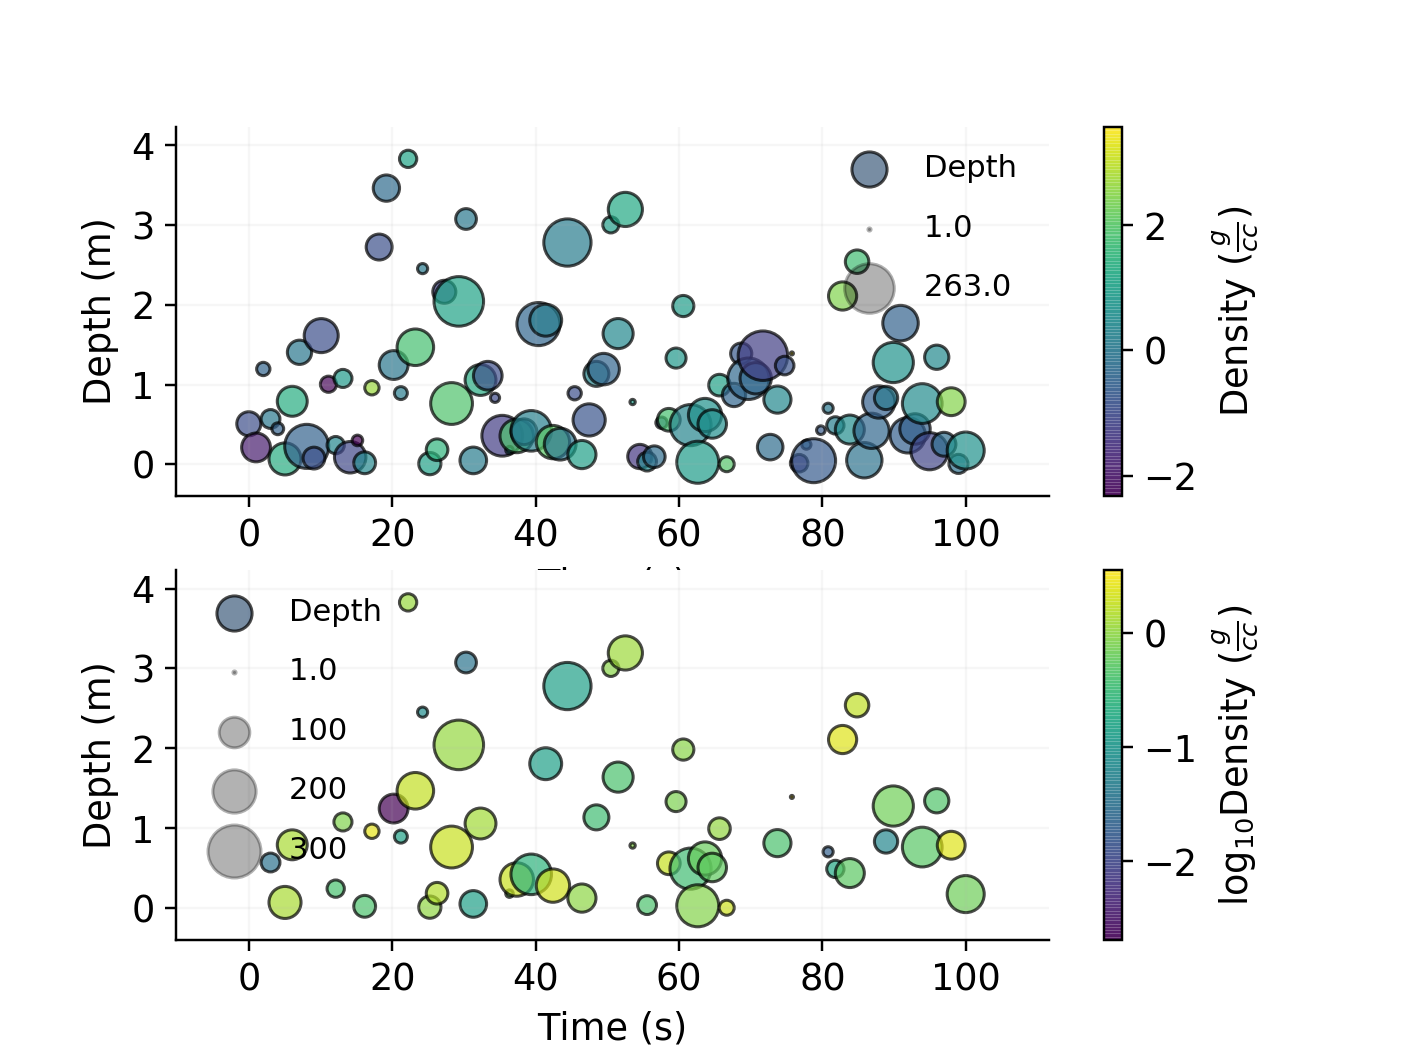

Values <= 0.0 have been masked before taking their log


In [47]:
s = np.ceil(100*(np.abs(np.random.randn(Density.size))))
plt.figure()
plt.tight_layout()
ax1 = plt.subplot(211)
Density.scatter(x=Time, y=Depth, s=s, alpha=0.7,edgecolor='k', sizeLegend=2)
plt.subplot(212, sharex=ax1)
#Density.scatter(x=Time, y=Depth, s=s, alpha=0.7,edgecolor='k', sizeLegend=[1.0, 100, 200, 300])
v = np.abs(Density)+1.0
Density.scatter(x=Time, y=Depth, s=s, alpha=0.7,edgecolor='k', sizeLegend=[1.0, 100, 200, 300], log=10)

Of course we can still take the log, or equalize the colour histogram

<IPython.core.display.Javascript object>


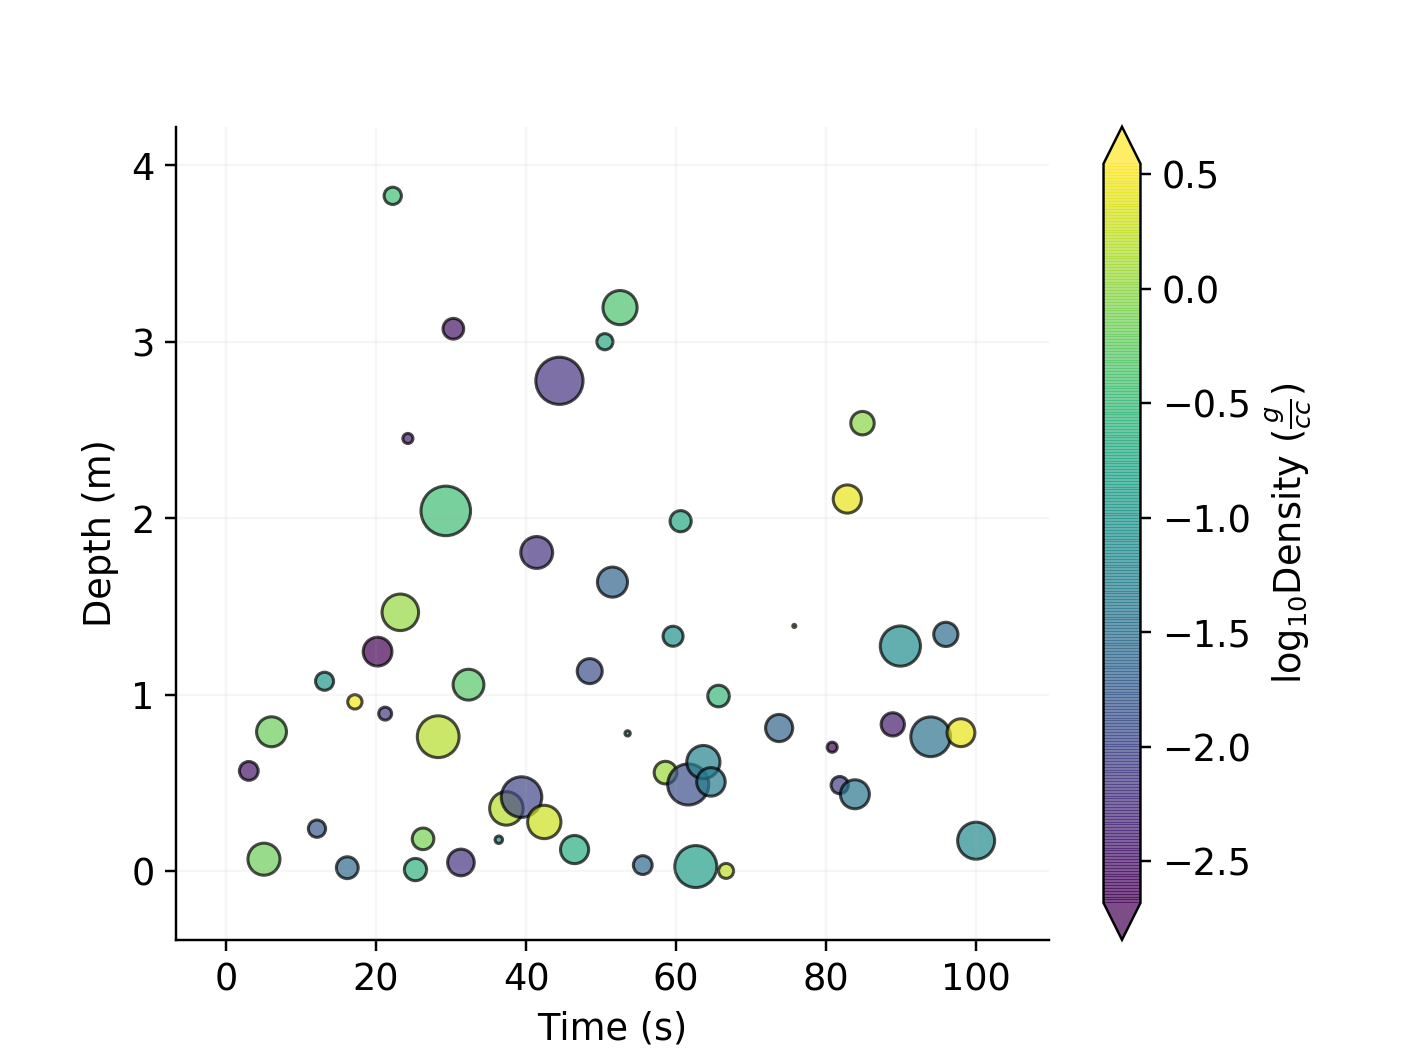

Values <= 0.0 have been masked before taking their log


In [48]:
plt.figure()
Density.scatter(x=Time, y=Depth, s=s, alpha=0.7,edgecolor='k',equalize=True,log=10)

#### Typically pcolor only works with 2D arrays. The StatArray has a pcolor method that will pcolor a 1D array

<IPython.core.display.Javascript object>


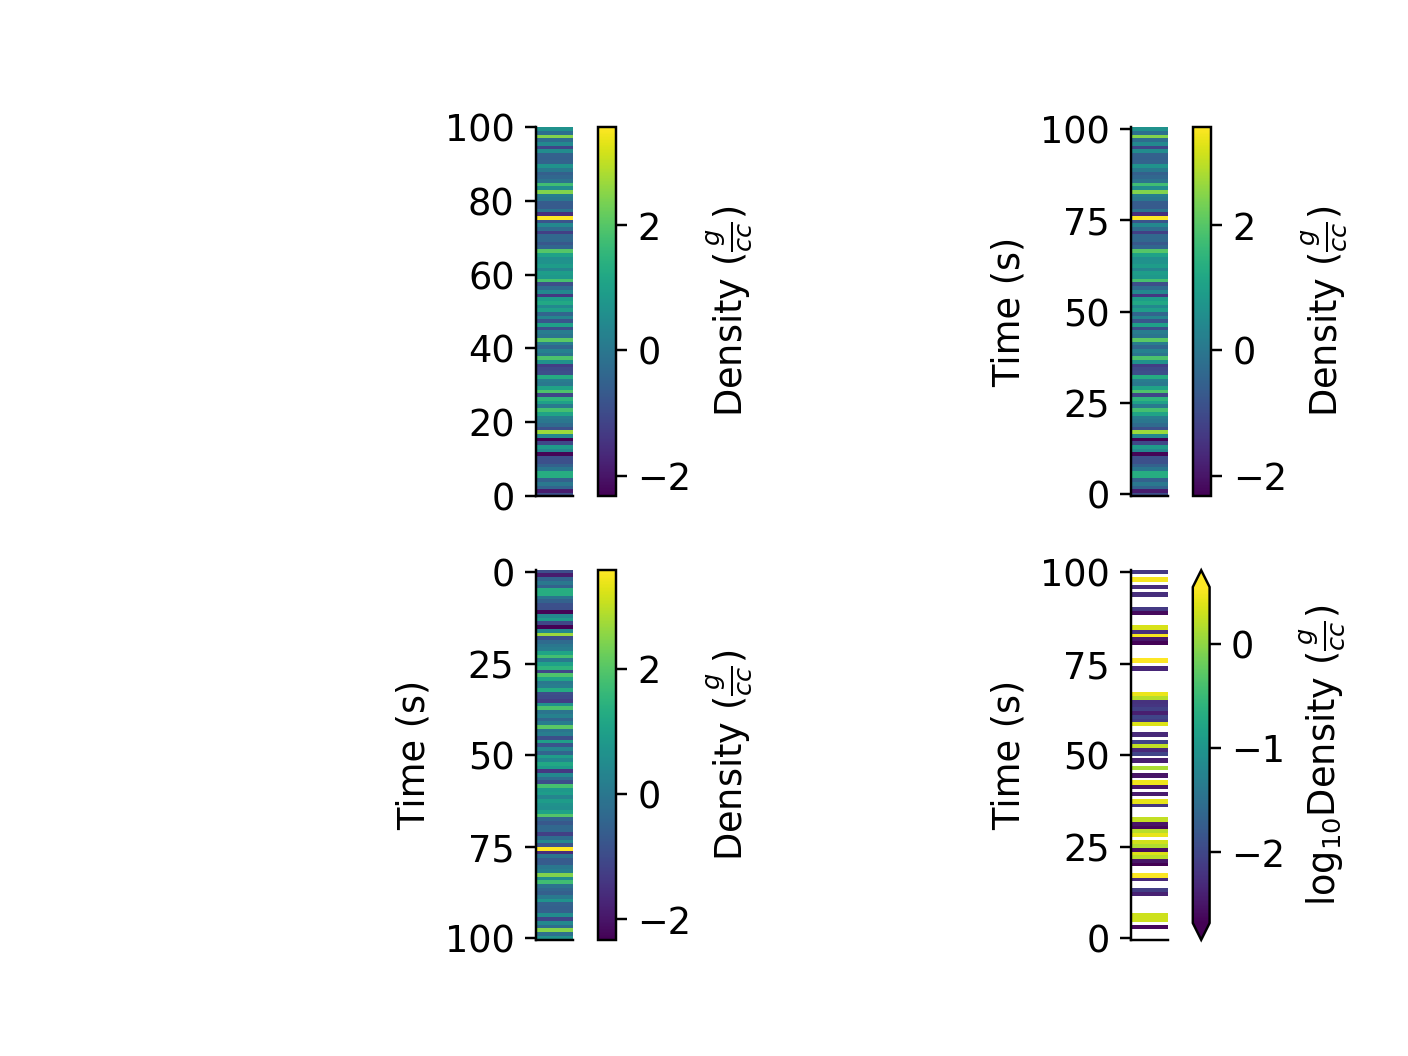

Values <= 0.0 have been masked before taking their log


In [49]:
plt.figure()
plt.subplot(221)
Density.pcolor()
plt.subplot(222)
Density.pcolor(y=Time)
plt.subplot(223)
Density.pcolor(y=Time, flipY=True)
plt.subplot(224)
Density.pcolor(y=Time, log=10, equalize=True)

#### We can add grid lines, and add opacity to each element in the pcolor image

This is useful if the colour values need to be scaled by another variable e.g. variance.

<IPython.core.display.Javascript object>


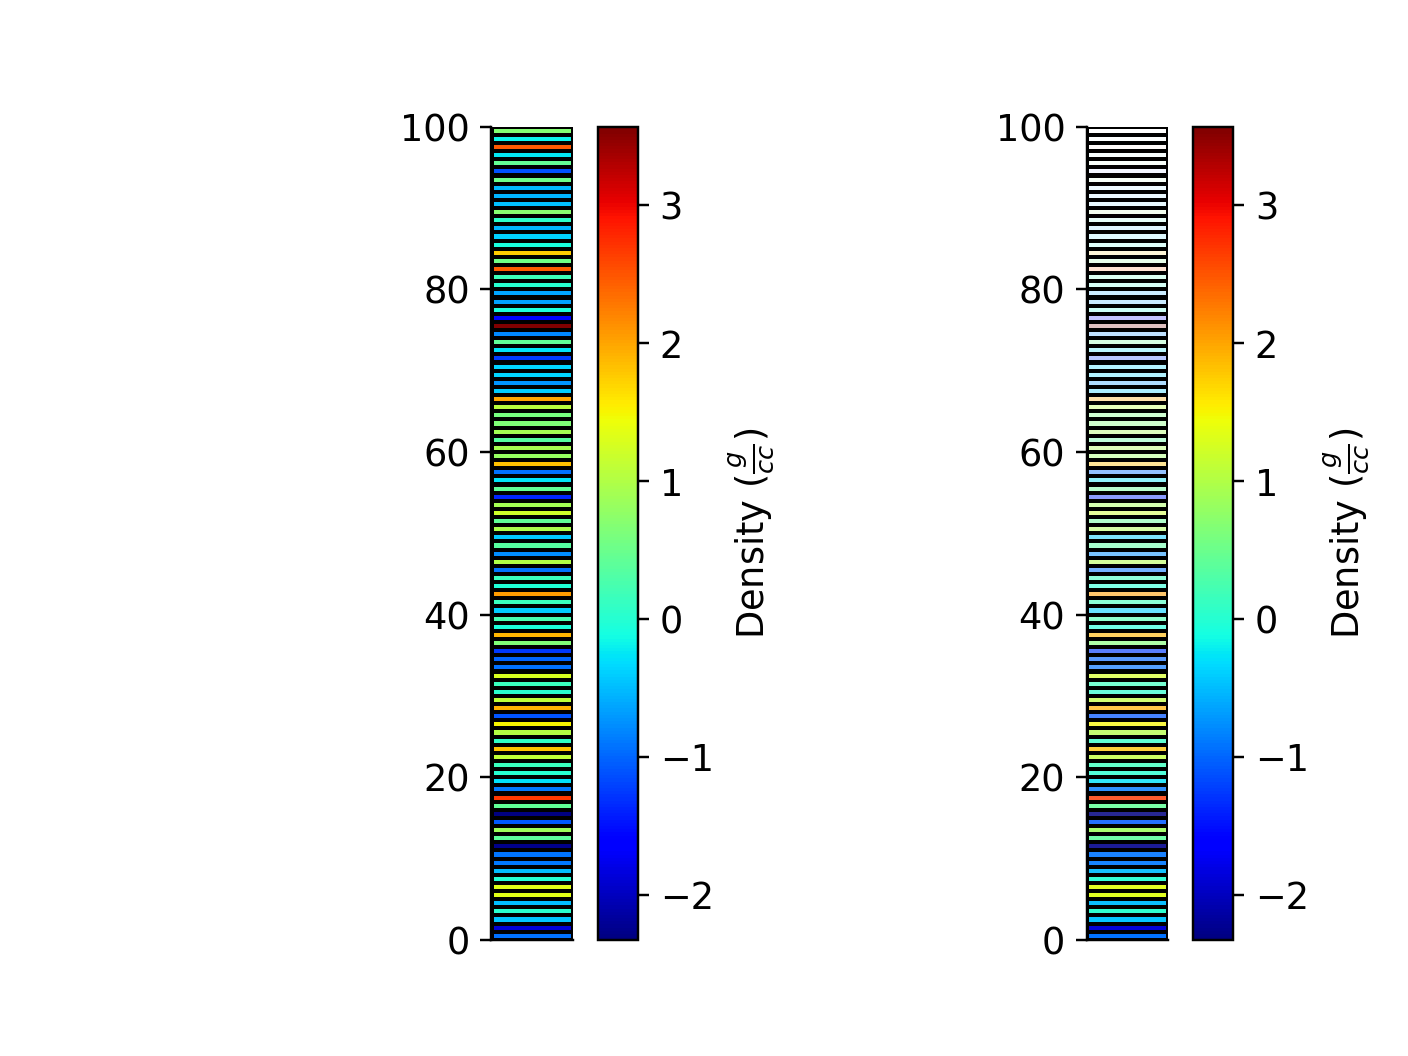

In [50]:
plt.figure()
plt.subplot(121)
Density.pcolor(grid=True, cmap='jet')
plt.subplot(122)
a = np.linspace(1.0, 0.0, Density.size)
Density.pcolor(grid=True, alpha=a, cmap='jet')

#### We can plot a histogram of the StatArray

<IPython.core.display.Javascript object>


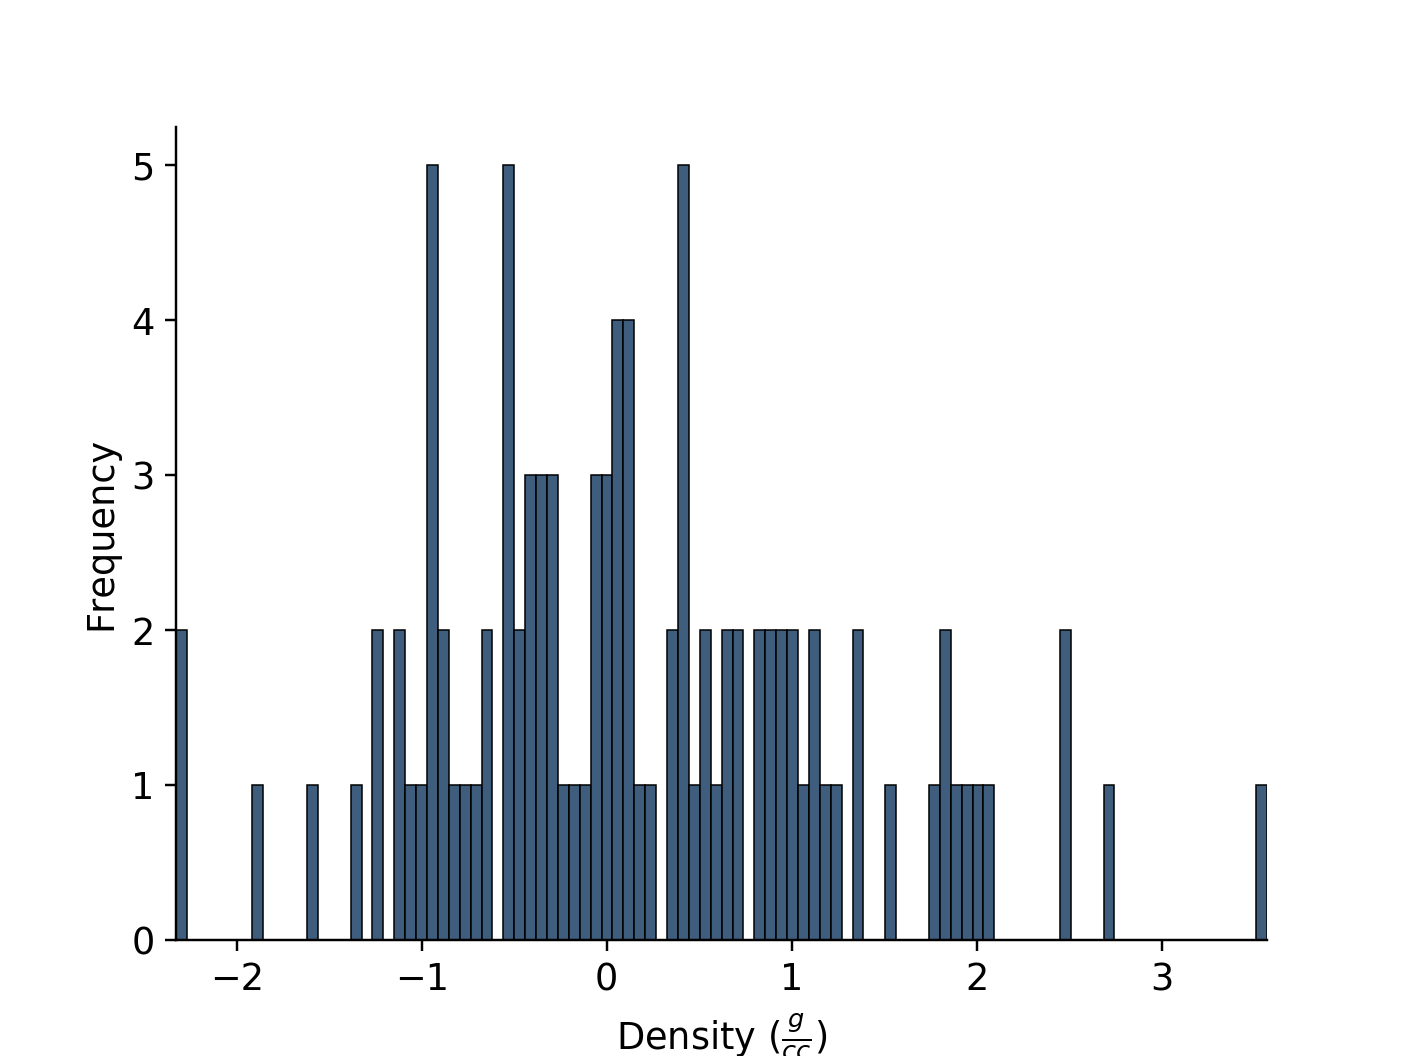

In [51]:
plt.figure()
Density.hist(100)

#### We can write the StatArray to a HDF5 file.  HDF5 files are binary files that can include compression.  They allow quick and easy access to parts of the file, and can also be written to and read from in parallel!

In [52]:
with h5py.File('1Dtest.h5','w') as f:
    Density.toHdf(f,'test')

#### We can then read the StatArray from the file
Here x is a new variable, that is read in from the hdf5 file we just wrote. 

In [53]:
x = hdfRead.readKeyFromFiles('1Dtest.h5','/','test')
print('x has the same values as Density? ',np.all(x == Density))
x[2] = 5.0 # Change one of the values in x
print('x has its own memory allocated (not a reference/pointer)? ',np.all(x == Density) == False)

x has the same values as Density?  True
x has its own memory allocated (not a reference/pointer)?  True


## We can also define a 2D array

In [54]:
Density = StatArray(np.random.randn(50,100),"Density","$\frac{g}{cc}$")
Density.summary()

Name:  Density
    Units: $\frac{g}{cc}$
    Shape: (50, 100)
   Values: [[ 1.89605372 -0.11410147 -2.12866759 ... -0.55585995  0.11555955
   0.36108461]
 [-0.24514243 -0.09075876  0.5533913  ...  0.50457853  0.39017702
   0.48185902]
 [ 1.82898891 -1.83344474 -0.39481638 ... -1.77139723 -0.04353042
  -1.20786635]
 ...
 [ 0.88627807 -0.97097488  0.14265787 ... -0.75886485  0.17170823
  -0.55287196]
 [-1.50573315 -0.6629616  -0.49935997 ... -1.2034074  -0.57488489
  -2.21577662]
 [-0.53929525 -0.22022079  1.42654735 ...  0.13715548  0.9462604
   0.24112446]]
No attached prior 
No attached proposal 



### The StatArray Class's functions work whether it is 1D or 2D

#### We can still do a histogram

<IPython.core.display.Javascript object>


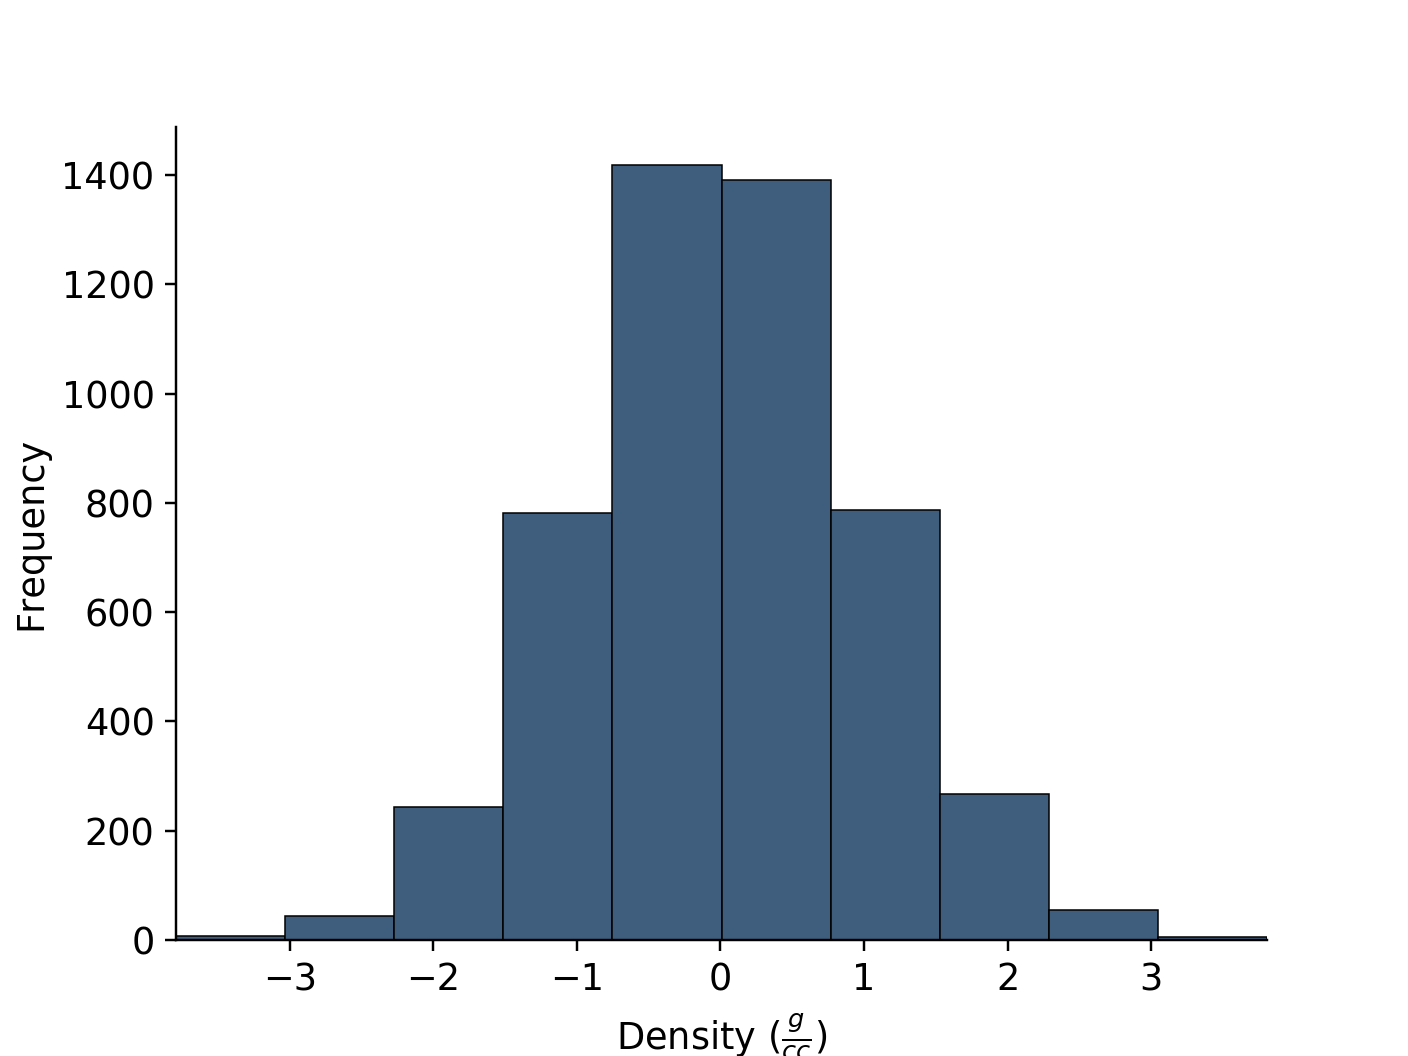

In [55]:
plt.figure()
Density.hist()

#### And we can use pcolor to plot the 2D array

<IPython.core.display.Javascript object>


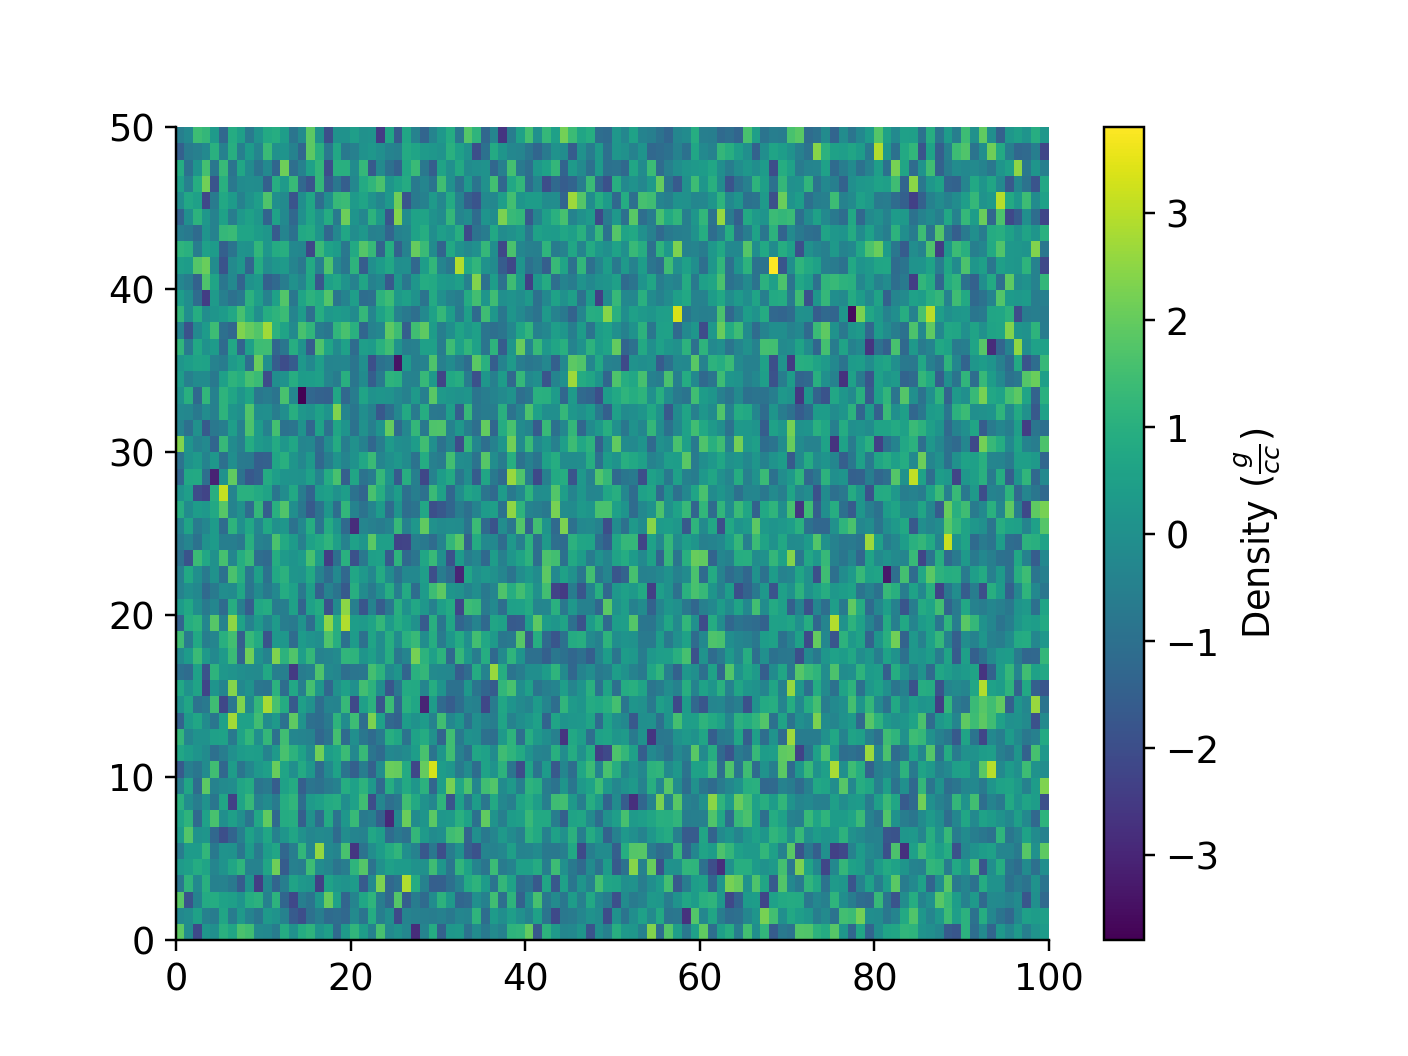

In [56]:
plt.figure()
ax = Density.pcolor()

#### The StatArray comes with extra plotting options
Here we specify the x and y axes for the 2D array using two other 1D StatArrays

<IPython.core.display.Javascript object>


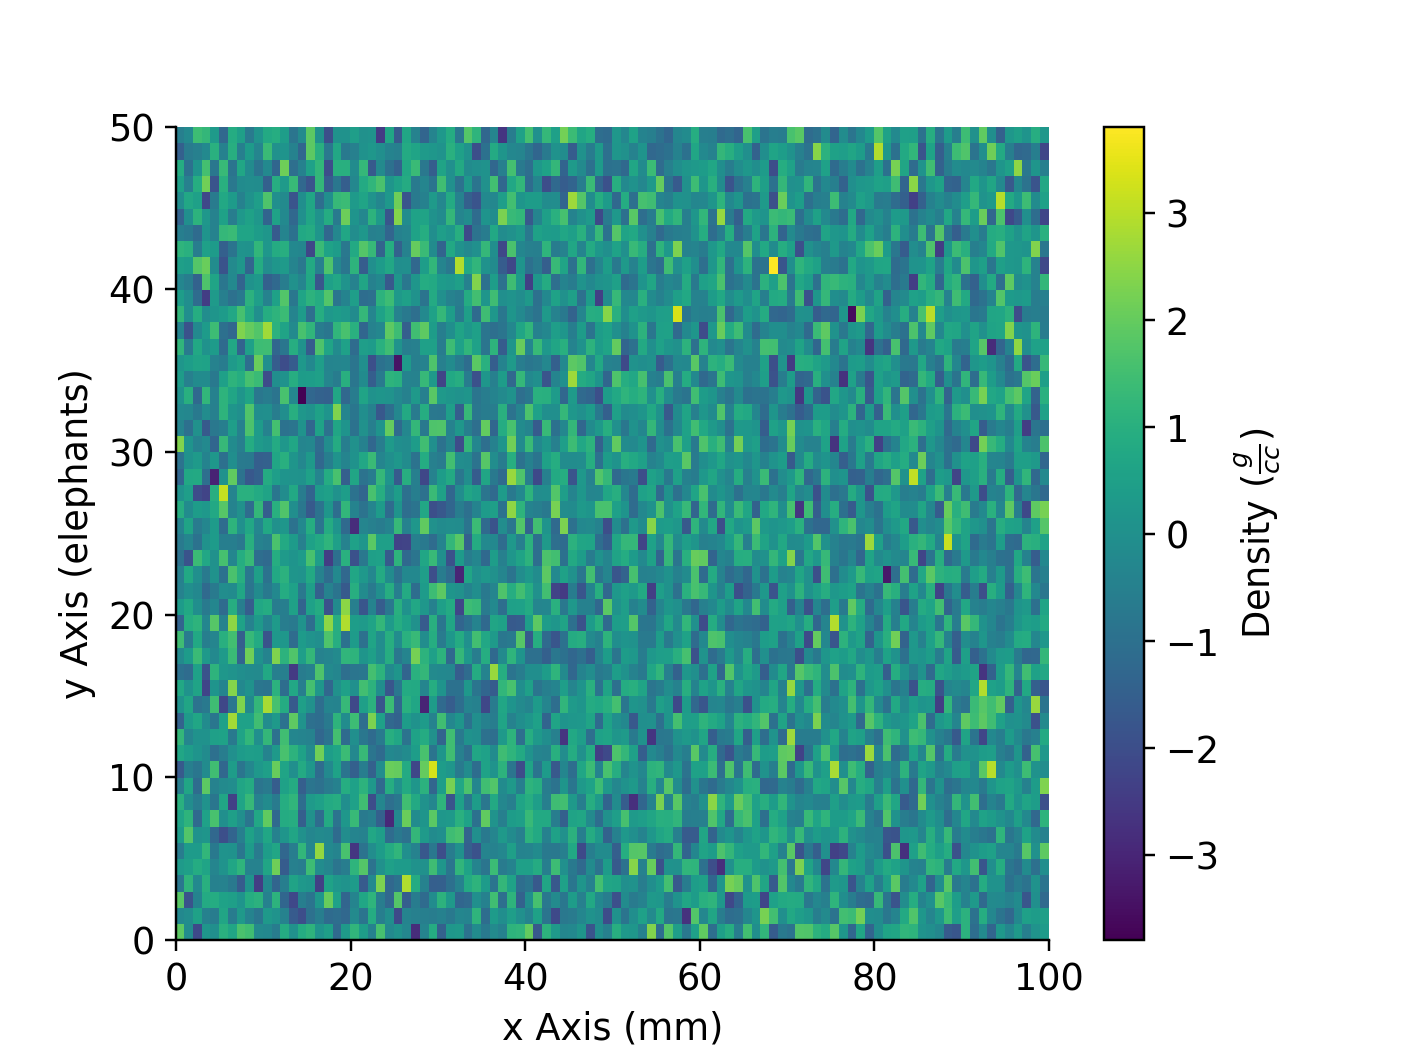

In [57]:
plt.figure()
x = StatArray(np.arange(101),name='x Axis',units = 'mm')
y = StatArray(np.arange(51),name='y Axis',units = 'elephants')
ax=Density.pcolor(x=x, y=y)

We can plot using a log10 scale, in this case, we have values that are less than or equal to 0.0.  Plotting with the log option will by default mask any of those values, and will let you know that it has done so!

<IPython.core.display.Javascript object>


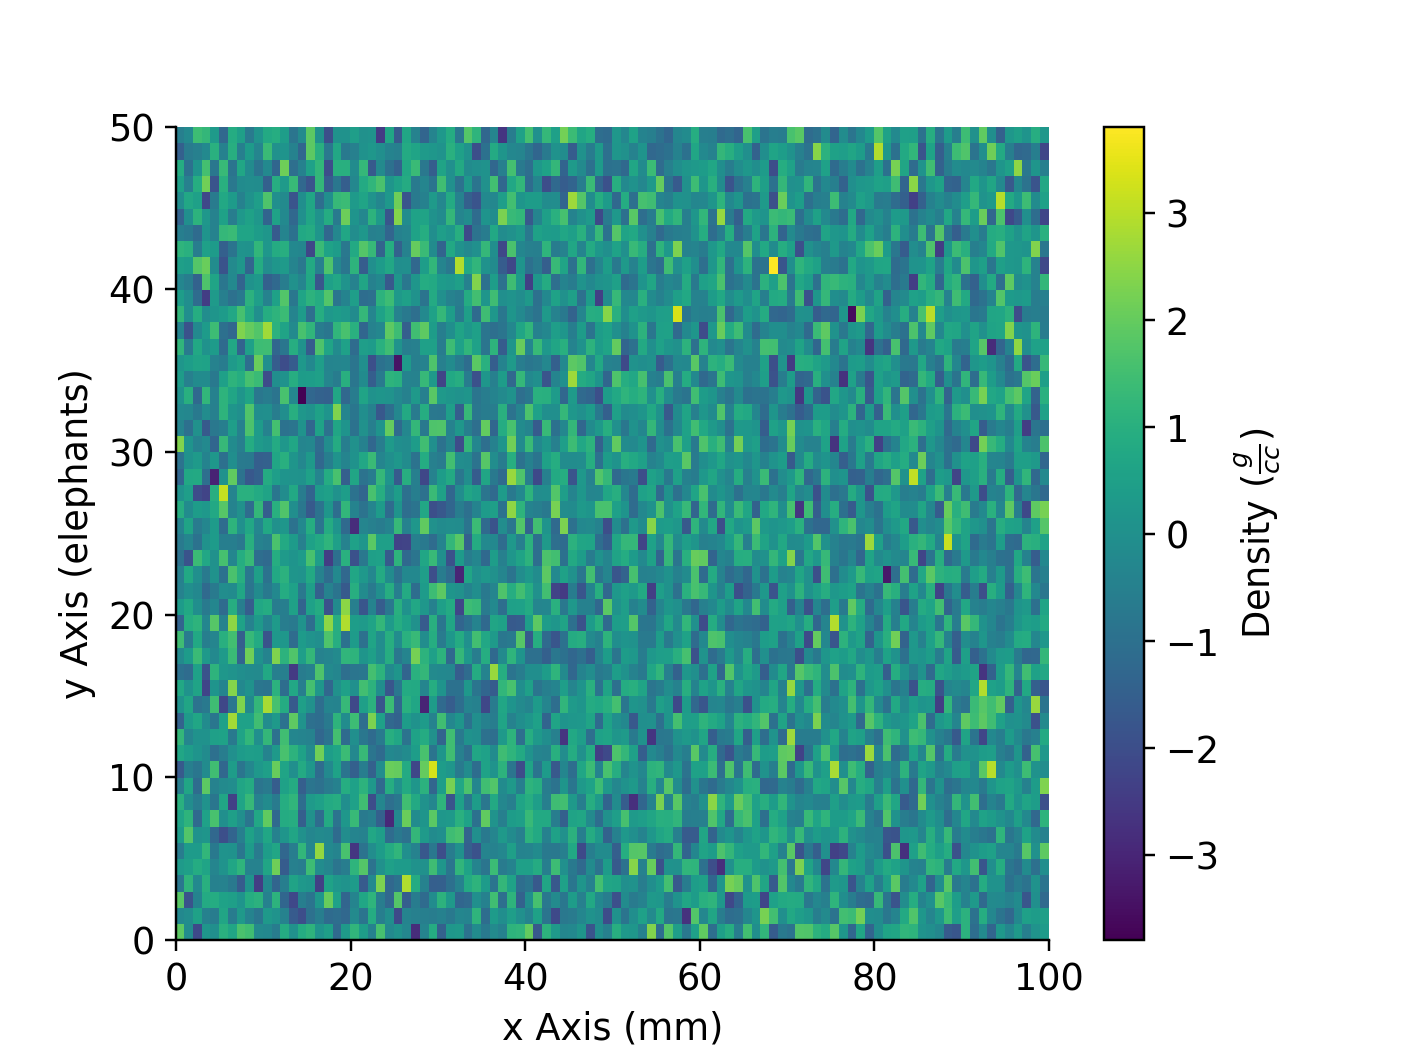

In [58]:
plt.figure()
ax=Density.pcolor(x=x,y=y,log=2)

A neat trick with colourmaps is histogram equalization.  This approach forces all colours in the image to have an equal amount.  This distorts the colours, but can really highlight the lower and higher ends of whatever you are plotting

<IPython.core.display.Javascript object>


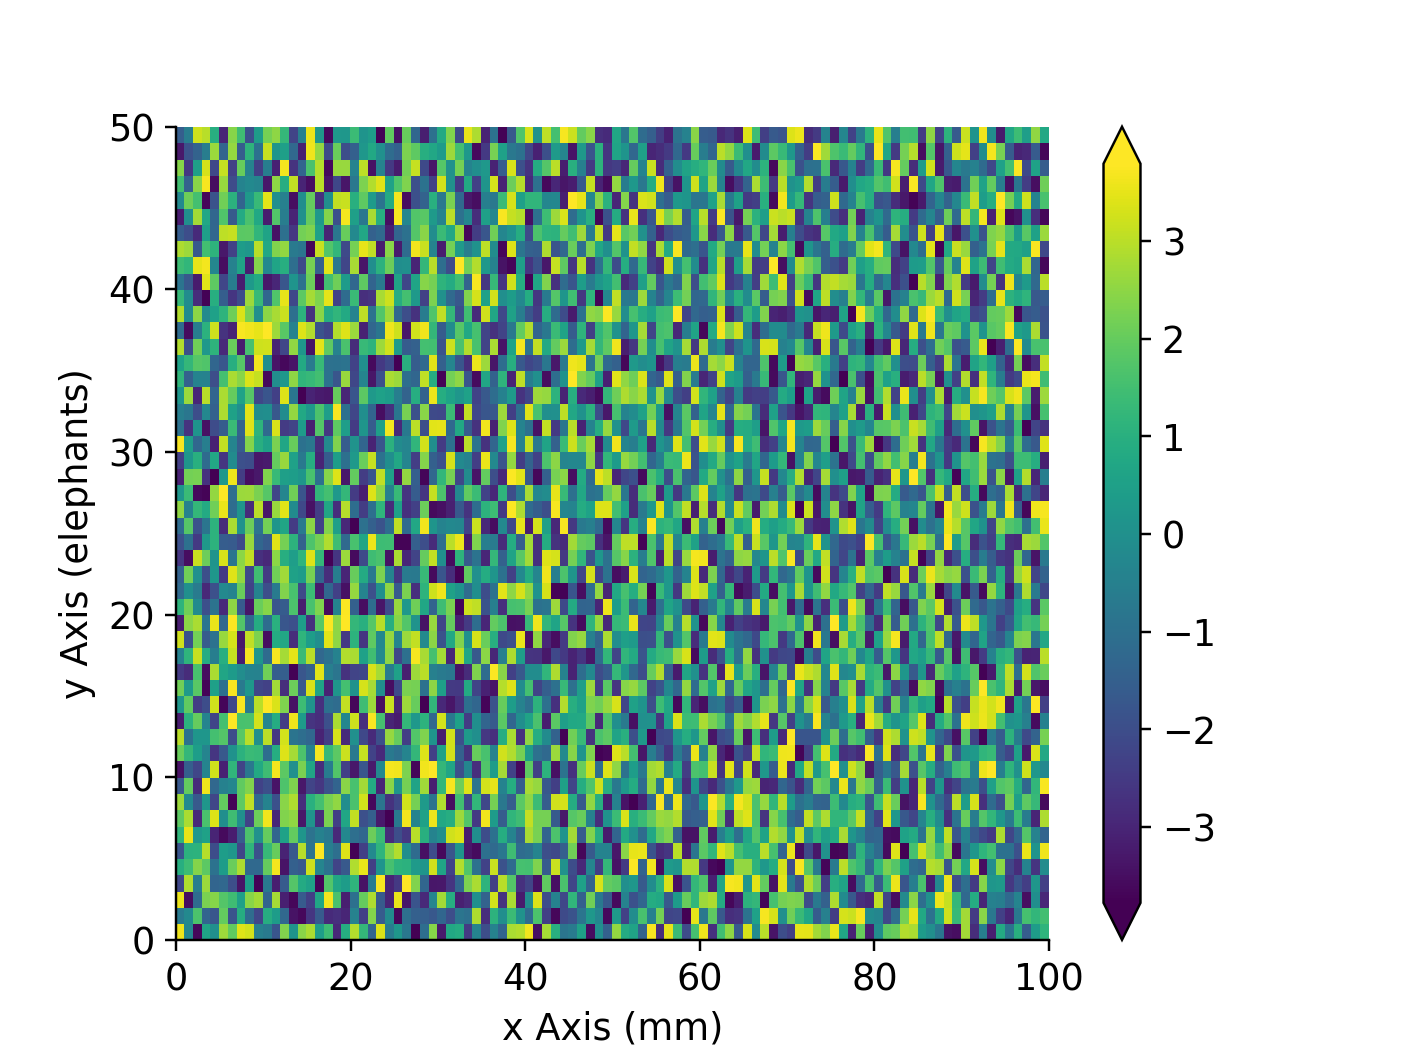

In [59]:
plt.figure()
ax=Density.pcolor(x=x, y=y, equalize=True)

We can equalize the log10 plot too :)

<IPython.core.display.Javascript object>


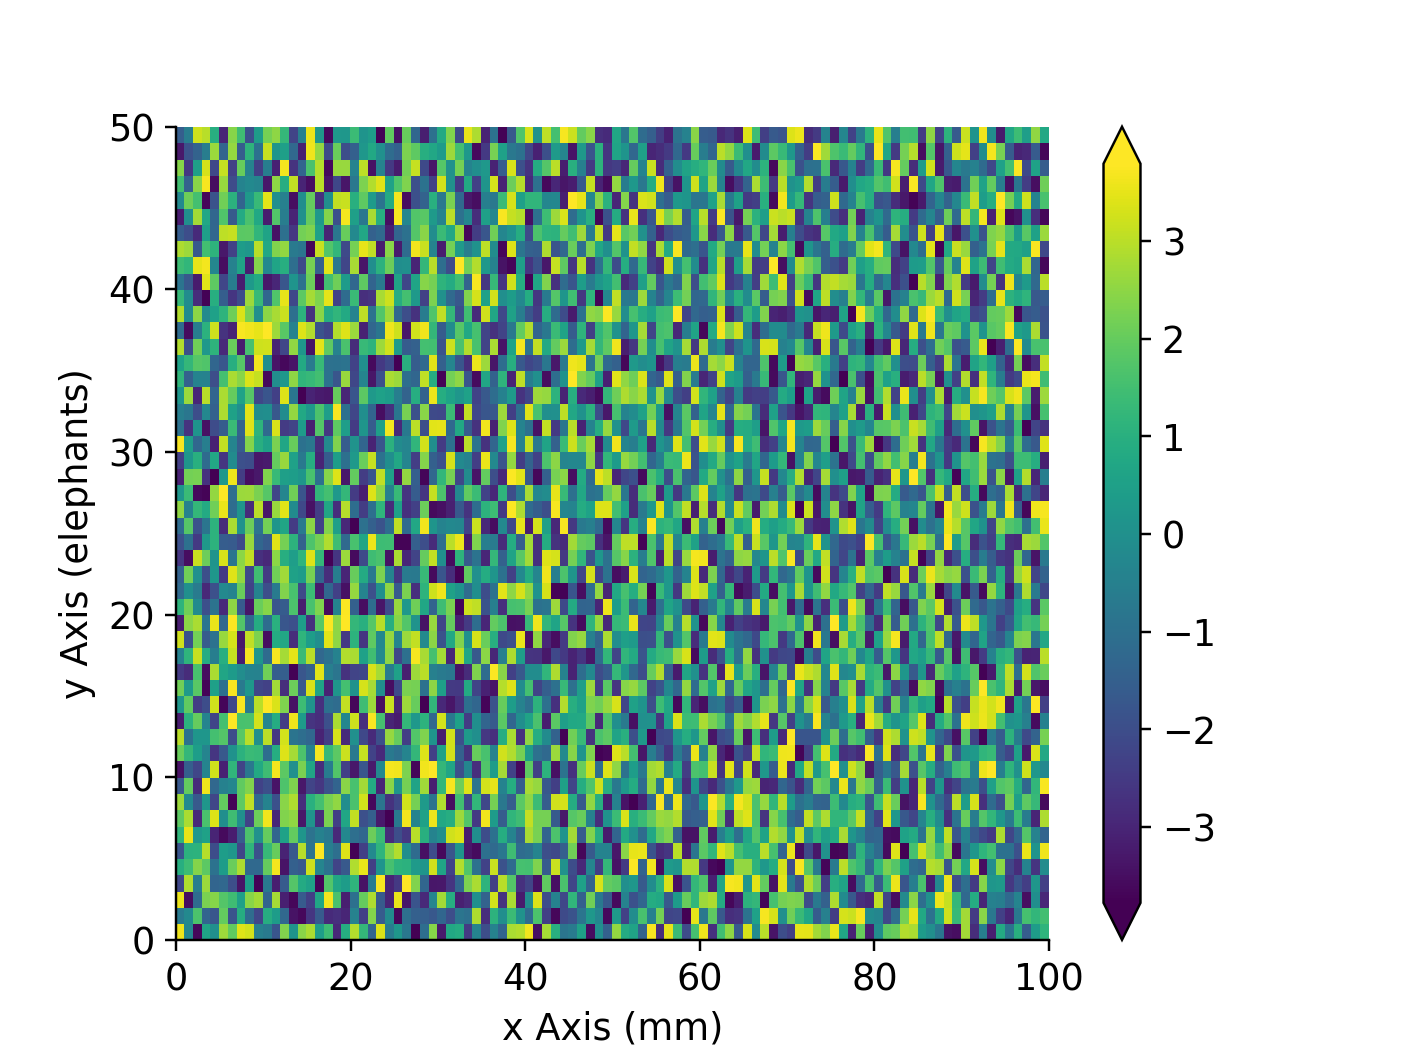

In [60]:
plt.figure()
ax=Density.pcolor(x=x,y=y,equalize=True, log=10)

#### We can add opacity to each pixel in the image

In [61]:
a = StatArray(np.random.random(Density.shape), 'Opacity from 0.0 to 1.0')

<IPython.core.display.Javascript object>


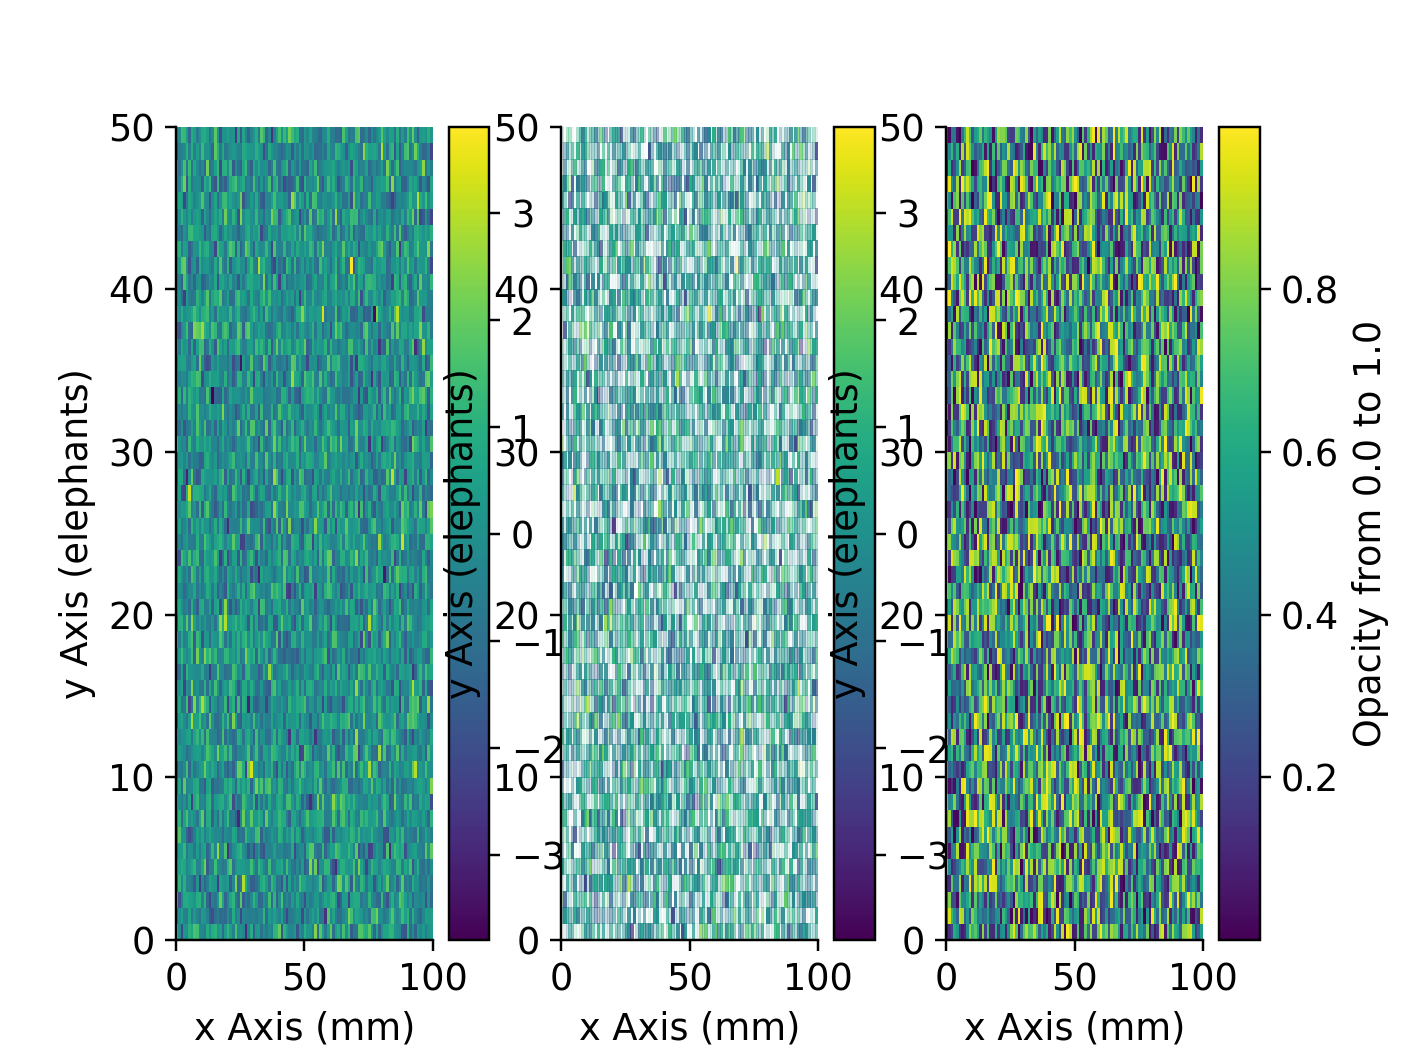

In [62]:
plt.figure()
ax1 = plt.subplot(131)
ax = Density.pcolor(x=x, y=y, flipY=True, grid=True, linewidth=0.1, noColorbar=True)
plt.subplot(132, sharex=ax1, sharey=ax1)
ax = Density.pcolor(x=x, y=y, alpha=a, flipY=True, grid=True, linewidth=0.1, noColorbar=True)
plt.subplot(133, sharex=ax1, sharey=ax1)
ax = a.pcolor(x=x, y=y, flipY=True)

#### If the array potentially has a lot of white space around the edges, we can trim the image

<IPython.core.display.Javascript object>


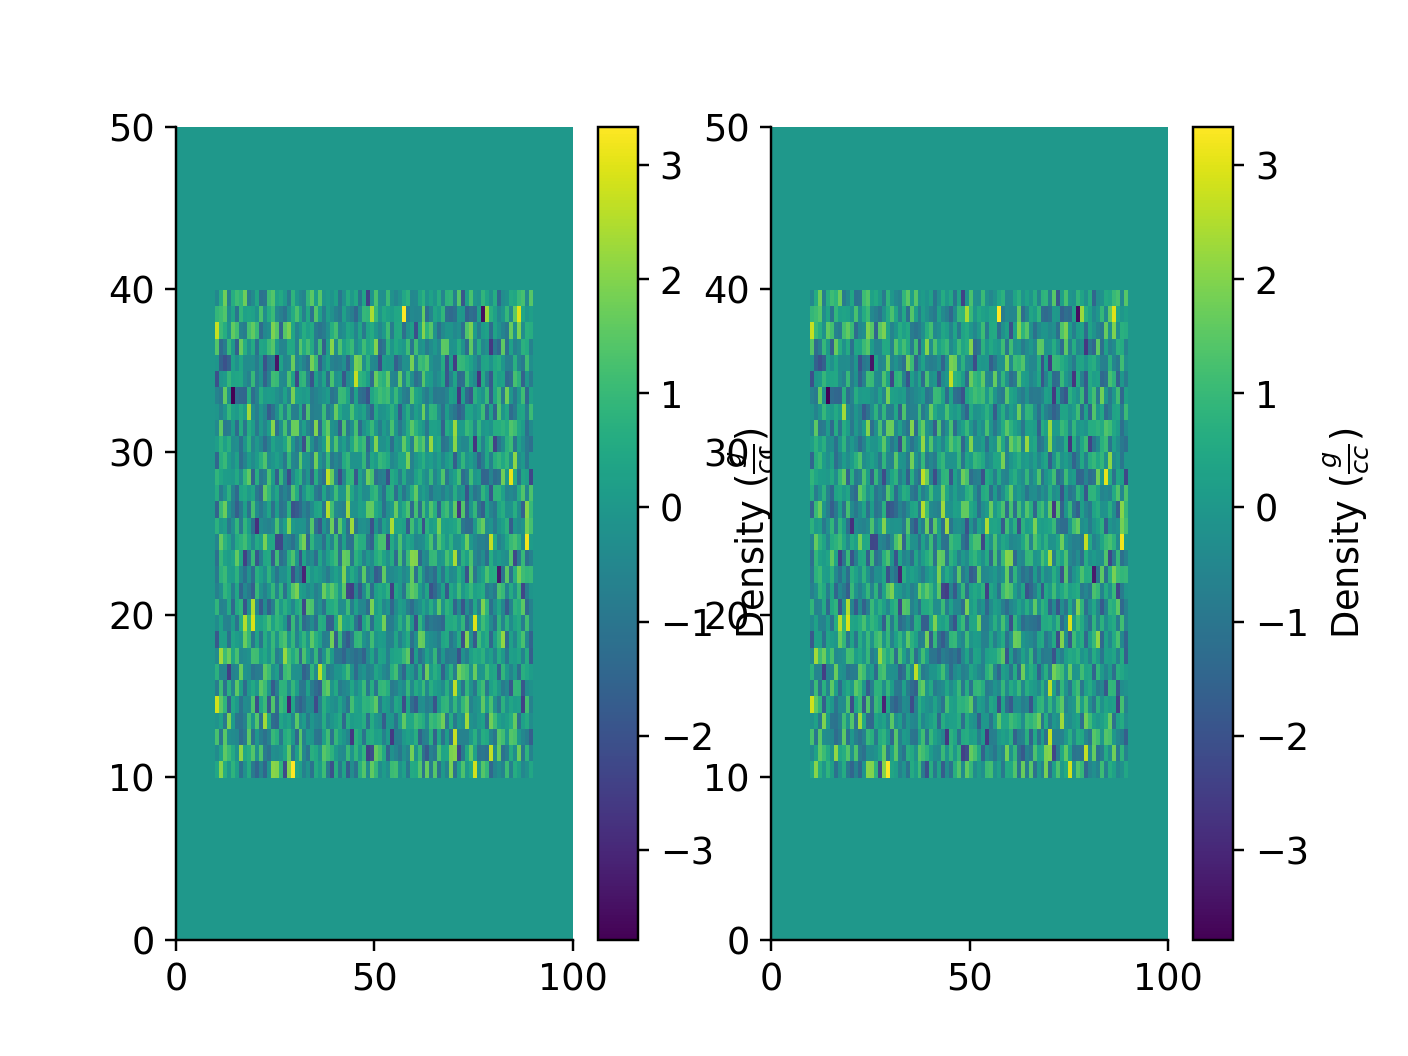

In [63]:
Density[:10, :] = 0.0
Density[-10:, :] = 0.0
Density[:, :10] = 0.0
Density[:, -10:] = 0.0
plt.figure()
plt.subplot(121)
Density.pcolor()
plt.subplot(122)
Density.pcolor(trim=True)


### Create a stacked area plot of a 2D StatArray

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


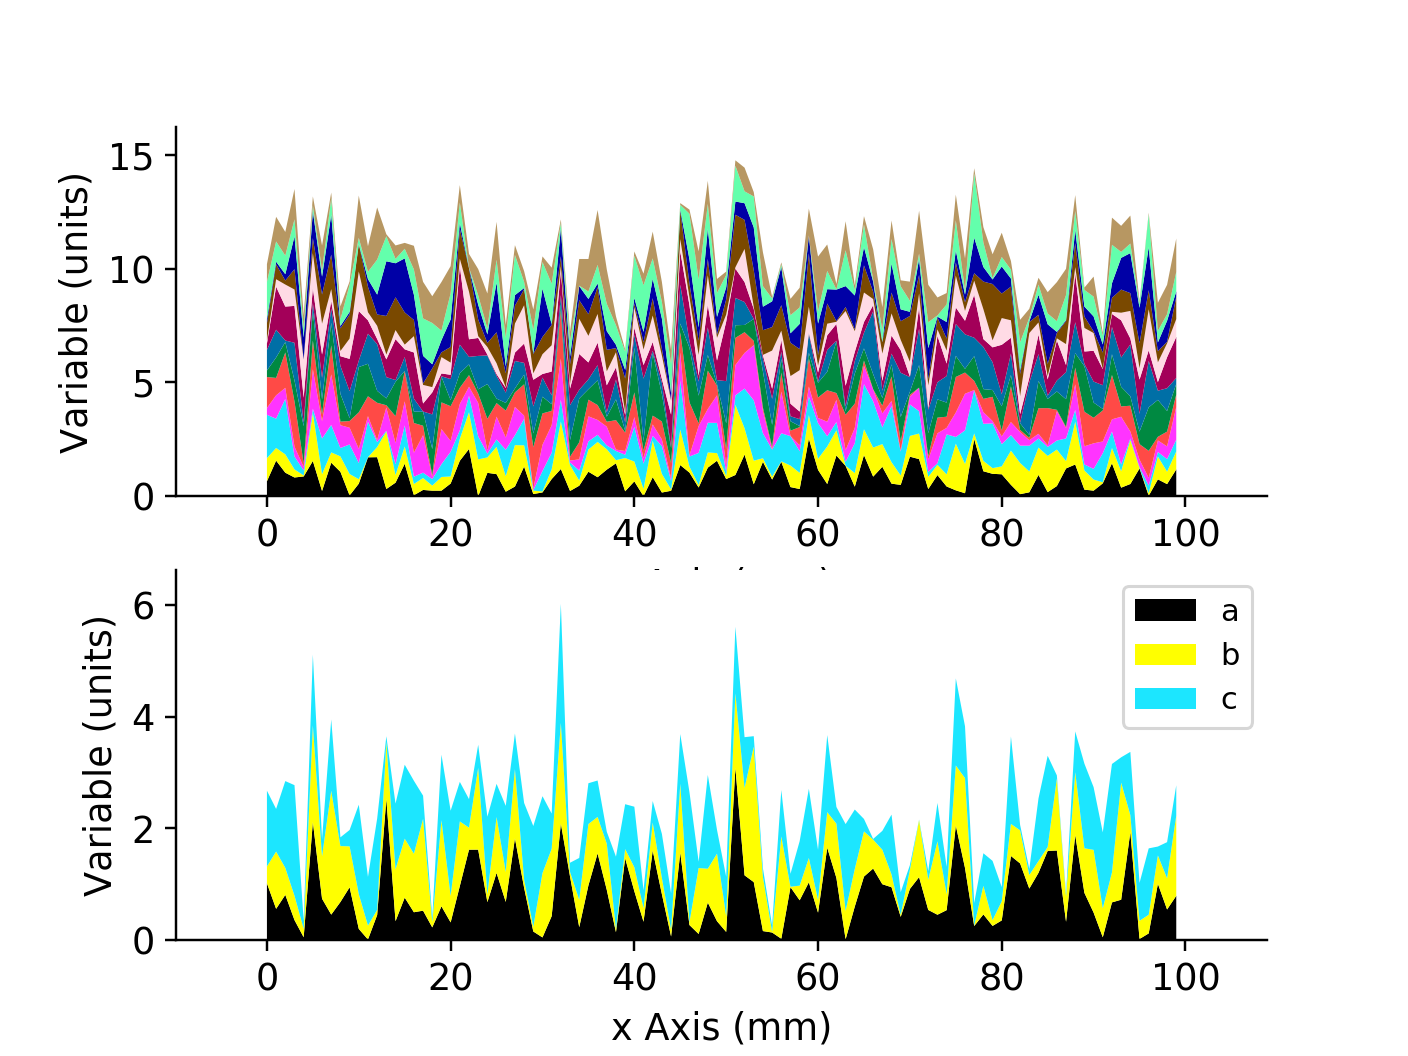

In [64]:
A = StatArray(np.abs(np.random.randn(13,100)), name='Variable', units="units")
x = StatArray(np.arange(100),name='x Axis',units = 'mm')
plt.figure()
ax1 = plt.subplot(211)
A.stackedAreaPlot(x=x, axis=1)
plt.subplot(212, sharex=ax1)
A.stackedAreaPlot(x=x, i=np.s_[[1,3,4],:], axis=1, labels=['a','b','c'])